------------------------------------------------------------------------------
<center> <h2>                  Universidad Internacional de Valencia              </h2> </center>
<center> <h3>             Máster Universitario en Big Data y Ciencia de Datos      </h3> </center>
<center> <h1>             Optimización de portafolios para activos colombianos: propuesta de un sistema de Inversión basado en recomendaciones de expertos          </h1> </center>
<center> <h2>                      Michael Steven Rodriguez Caceres                   </h2> </center>

------------------------------------------------------------------------------

In [1]:
import numpy as np
#!pip install pandas-datareader
#!pip install yfinance
import yfinance as yf
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

# Optimización Portafolio

## Escenario 1

### **Descarga los tickers (cuida que los tickers sean tal como vienen en Yahoo Finance)**

In [2]:
tickers = ['BCOLOMBIA.CL', 'GEB.CL', 'GRUPOARGOS.CL','PEI.CL', 'ISA.CL', 'ECOPETROL.CL', 'PFDAVVNDA.CL', 'GRUPOAVAL.CL', 'CNEC.CL', 'CEMARGOS.CL', 'EXITO.CL', 'CORFICOLCF.CL', 'GRUPOSURA.CL', 'BOGOTA.CL']
numero_de_tickers = len(tickers)

tickers = sorted(tickers)

#---------------------
print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Tickers")
print (tickers)
print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Cant. Tickers")
print (numero_de_tickers)
print ("-------------------------------------------------------------------------------------------------------------------------------")


-------------------------------------------------------------------------------------------------------------------------------
Tickers
['BCOLOMBIA.CL', 'BOGOTA.CL', 'CEMARGOS.CL', 'CNEC.CL', 'CORFICOLCF.CL', 'ECOPETROL.CL', 'EXITO.CL', 'GEB.CL', 'GRUPOARGOS.CL', 'GRUPOAVAL.CL', 'GRUPOSURA.CL', 'ISA.CL', 'PEI.CL', 'PFDAVVNDA.CL']
-------------------------------------------------------------------------------------------------------------------------------
Cant. Tickers
14
-------------------------------------------------------------------------------------------------------------------------------


In [3]:
data_ActFinancieros = pd.DataFrame()
#data_ActFinancieros = yf.download(tickers, start="2022-01-01", end="2024-02-20", period = "5d")['Adj Close']
data_ActFinancieros = yf.download(tickers,'2022-01-01')['Adj Close']
data_ActFinancieros.head(20)

[*********************100%%**********************]  14 of 14 completed


BCOLOMBIA.CL     BOGOTA.CL  CEMARGOS.CL       CNEC.CL  \
Date                                                                
2022-01-03  27607.398438  53225.515625  5241.721680  50196.917969   
2022-01-04  27879.472656  53452.976562  5296.897949  52146.796875   
2022-01-05  27207.291016  53452.976562  5292.652832  50696.882812   
2022-01-06  27095.257812  53308.925781  5135.613770  50196.917969   
2022-01-07  27367.330078  54893.554688  5262.942871  50846.878906   
2022-01-10  27367.330078  54893.554688  5262.942871  50846.878906   
2022-01-11  27847.460938  56106.671875  5356.318359  50496.902344   
2022-01-12  28311.582031  54135.351562  5356.318359  50696.882812   
2022-01-13  30088.058594  54142.937500  5339.340820  49946.929688   
2022-01-14  29191.826172  53665.265625  5237.477051  50346.906250   
2022-01-17  29191.826172  53665.265625  5237.477051  50346.906250   
2022-01-18  29191.826172  53665.265625  5237.477051  50346.906250   
2022-01-19  29191.826172  53665.265625  5237.477051  50346.906250   
2022-01-20  32248.636719  57243.960938  5585.510254  50996.867188   
2022-01-21  31088.332031  57623.066406  5462.425781  49946.929688   
2022-01-24  32008.576172  57698.906250  5470.914062  50196.917969   
2022-01-25  31848.533203  58214.449219  5470.914062  50196.917969   
2022-01-26  31208.361328  57094.335938  5377.539551  49546.960938   
2022-01-27  31288.380859  57451.980469  5369.050293  49996.929688   
2022-01-28  31696.488281  57451.980469  5398.761719  49621.957031   

            CORFICOLCF.CL  ECOPETROL.CL     EXITO.CL       GEB.CL  \
Date                                                                
2022-01-03   23716.613281   2319.017822  3557.147217  2043.174561   
2022-01-04   23856.460938   2336.069092  3560.242920  2057.699463   
2022-01-05   23840.007812   2267.863037  3507.613525  2034.298096   
2022-01-06   23198.351562   2229.496826  3467.366943  1964.901001   
2022-01-07   23749.517578   2260.189697  3467.366943  2001.213379   
2022-01-10   23749.517578   2260.189697  3467.366943  2001.213379   
2022-01-11   23527.406250   2353.973877  3467.366943  2023.807739   
2022-01-12   23922.271484   2378.698486  3544.763916  2081.907715   
2022-01-13   23716.613281   2385.519043  3498.325928  2039.139771   
2022-01-14   23552.083984   2388.076904  3498.325928  1997.179077   
2022-01-17   23552.083984   2388.076904  3498.325928  1997.179077   
2022-01-18   23552.083984   2388.076904  3498.325928  1997.179077   
2022-01-19   23552.083984   2388.076904  3498.325928  1997.179077   
2022-01-20   24481.664062   2477.597900  3591.201904  2103.695068   
2022-01-21   25082.189453   2430.705811  3591.201904  2089.977051   
2022-01-24   24637.964844   2407.686035  3653.118896  2102.081299   
2022-01-25   24827.171875   2468.219238  3684.077881  2129.517090   
2022-01-26   24679.095703   2464.809570  3653.118896  2138.393311   
2022-01-27   24514.570312   2476.745117  3628.352051  2138.393311   
2022-01-28   24432.306641   2460.546143  3693.365234  2138.393311   

            GRUPOARGOS.CL  GRUPOAVAL.CL  GRUPOSURA.CL        ISA.CL  PEI.CL  \
Date                                                                          
2022-01-03   11967.040039    859.952698  27902.093750  20557.347656     NaN   
2022-01-04   11967.040039    859.952698  28182.046875  20657.896484     NaN   
2022-01-05   11834.072266    876.650757  27006.240234  20795.003906     NaN   
2022-01-06   11417.442383    859.952698  26772.943359  20676.177734     NaN   
2022-01-07   12100.005859    859.952698  27174.212891  19835.236328     NaN   
2022-01-10   12100.005859    859.952698  27174.212891  19835.236328     NaN   
2022-01-11   12277.295898    884.999878  28387.345703  20475.082031     NaN   
2022-01-12   12764.841797    918.396057  28928.591797  20840.708984     NaN   
2022-01-13   13252.386719    910.046997  28200.708984  21114.927734     NaN   
2022-01-14   12605.281250    883.330017  25429.162109  20895.552734     NaN   
2022-01-17   12605.281250 

In [4]:
data_ActFinancieros.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 614 entries, 2022-01-03 to 2024-05-10
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BCOLOMBIA.CL   612 non-null    float64
 1   BOGOTA.CL      612 non-null    float64
 2   CEMARGOS.CL    612 non-null    float64
 3   CNEC.CL        612 non-null    float64
 4   CORFICOLCF.CL  612 non-null    float64
 5   ECOPETROL.CL   612 non-null    float64
 6   EXITO.CL       612 non-null    float64
 7   GEB.CL         612 non-null    float64
 8   GRUPOARGOS.CL  614 non-null    float64
 9   GRUPOAVAL.CL   611 non-null    float64
 10  GRUPOSURA.CL   613 non-null    float64
 11  ISA.CL         612 non-null    float64
 12  PEI.CL         1 non-null      float64
 13  PFDAVVNDA.CL   612 non-null    float64
dtypes: float64(14)
memory usage: 72.0 KB


In [5]:
#Se elimina PEI porque tiene un solo dato
data_ActFinancieros = data_ActFinancieros.drop('PEI.CL', axis=1)

#Se eliminan las filas con NaN
data_ActFinancieros = data_ActFinancieros.dropna()


data_ActFinancieros.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 611 entries, 2022-01-03 to 2024-05-10
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BCOLOMBIA.CL   611 non-null    float64
 1   BOGOTA.CL      611 non-null    float64
 2   CEMARGOS.CL    611 non-null    float64
 3   CNEC.CL        611 non-null    float64
 4   CORFICOLCF.CL  611 non-null    float64
 5   ECOPETROL.CL   611 non-null    float64
 6   EXITO.CL       611 non-null    float64
 7   GEB.CL         611 non-null    float64
 8   GRUPOARGOS.CL  611 non-null    float64
 9   GRUPOAVAL.CL   611 non-null    float64
 10  GRUPOSURA.CL   611 non-null    float64
 11  ISA.CL         611 non-null    float64
 12  PFDAVVNDA.CL   611 non-null    float64
dtypes: float64(13)
memory usage: 66.8 KB


In [6]:
# Reemplazar NaN con un espacio en blanco en columnas numéricas
#data_ActFinancieros = data_ActFinancieros.replace({np.nan: ''})

#data_ActFinancieros.head(20)

In [7]:
# Convertir todas las columnas de tipo 'object' a tipo numérico
#for columna in data_ActFinancieros.columns:
#    if data_ActFinancieros[columna].dtype == 'object':
#        data_ActFinancieros[columna] = pd.to_numeric(data_ActFinancieros[columna], errors='coerce')

### **Normaliza las cotizaciones para hacerlas comparables en un gráfico**
La función **iloc()**  recupera un valor particular perteneciente a una fila y columna utilizando los valores de índice asignados a i (fila- columna específica)

<Axes: xlabel='Date'>

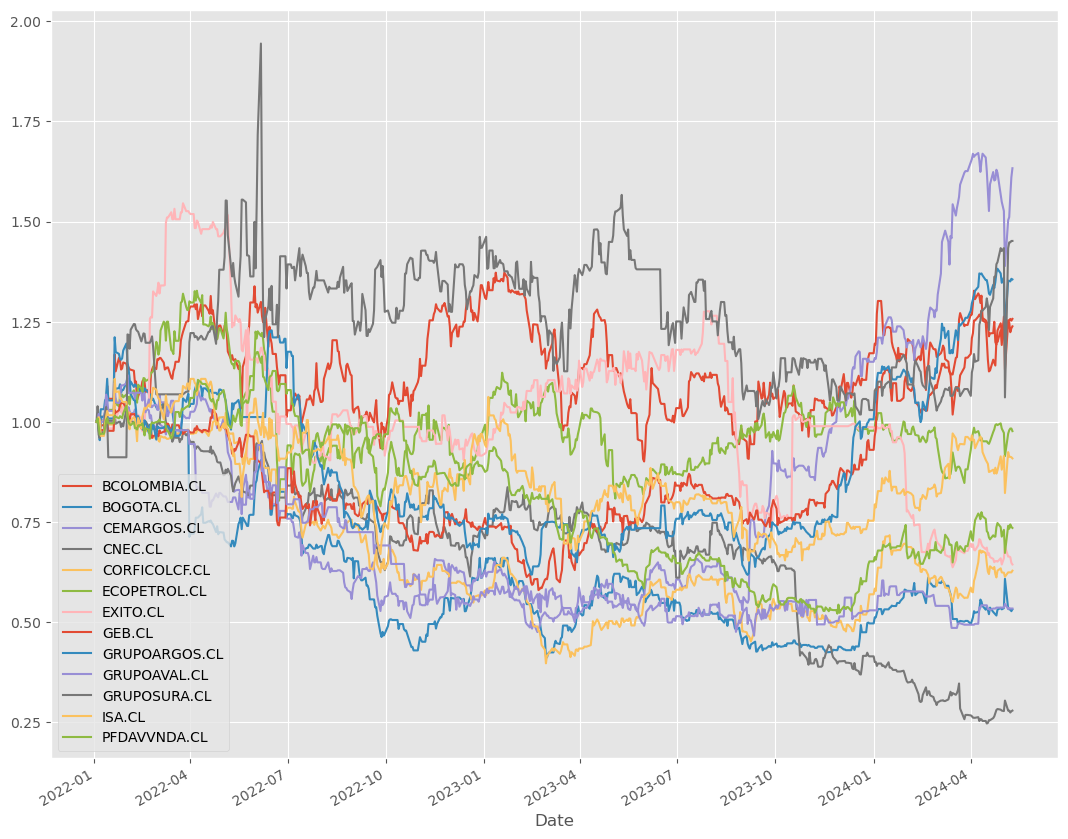

In [8]:
(data_ActFinancieros / data_ActFinancieros.iloc[0]).plot(figsize=(13, 11))

### **Obtener los rendimientos, rendimientos anualizados y matriz de varianza-covarianza**
Shift permite indexar (en este caso mover) la fórmula en "n" pasos/periodos

In [9]:
rendActFinan = np.log(data_ActFinancieros / data_ActFinancieros.shift(1))

rendActFinan = rendActFinan.dropna()

rendActFinan.head(20)

BCOLOMBIA.CL  BOGOTA.CL  CEMARGOS.CL   CNEC.CL  CORFICOLCF.CL  \
Date                                                                        
2022-01-04      0.009807   0.004264     0.010471  0.038109       0.005879   
2022-01-05     -0.024406   0.000000    -0.000802 -0.028198      -0.000690   
2022-01-06     -0.004126  -0.002699    -0.030120 -0.009911      -0.027284   
2022-01-07      0.009991   0.029292     0.024491  0.012865       0.023481   
2022-01-10      0.000000   0.000000     0.000000  0.000000       0.000000   
2022-01-11      0.017392   0.021859     0.017587 -0.006907      -0.009396   
2022-01-12      0.016529  -0.035767     0.000000  0.003952       0.016644   
2022-01-13      0.060857   0.000140    -0.003175 -0.014903      -0.008634   
2022-01-14     -0.030240  -0.008862    -0.019262  0.007976      -0.006961   
2022-01-17      0.000000   0.000000     0.000000  0.000000       0.000000   
2022-01-18      0.000000   0.000000     0.000000  0.000000       0.000000   
2022-01-19      0.000000   0.000000     0.000000  0.000000       0.000000   
2022-01-20      0.099587   0.064556     0.064336  0.012827       0.038710   
2022-01-21     -0.036643   0.006601    -0.022283 -0.020803       0.024234   
2022-01-24      0.029171   0.001315     0.001553  0.004993      -0.017869   
2022-01-25     -0.005013   0.008895     0.000000  0.000000       0.007650   
2022-01-26     -0.020305  -0.019429    -0.017215 -0.013033      -0.005982   
2022-01-27      0.002561   0.006245    -0.001580  0.009041      -0.006689   
2022-01-28      0.012959   0.000000     0.005519 -0.007528      -0.003361   
2022-01-31     -0.002781   0.017072     0.018692  0.042895       0.002354   

            ECOPETROL.CL  EXITO.CL    GEB.CL  GRUPOARGOS.CL  GRUPOAVAL.CL  \
Date                                                                        
2022-01-04      0.007326  0.000870  0.007084       0.000000      0.000000   
2022-01-05     -0.029632 -0.014893 -0.011438      -0.011173      0.019231   
2022-01-06     -0.017062 -0.011540 -0.034709      -0.035841     -0.019231   
2022-01-07      0.013673  0.000000  0.018312       0.058064      0.000000   
2022-01-10      0.000000  0.000000  0.000000       0.000000      0.000000   
2022-01-11      0.040656  0.000000  0.011227       0.014546      0.028710   
2022-01-12      0.010449  0.022076  0.028304       0.038943      0.037041   
2022-01-13      0.002863 -0.013187 -0.020757       0.037483     -0.009132   
2022-01-14      0.001072  0.000000 -0.020792      -0.050062     -0.029797   
2022-01-17      0.000000  0.000000  0.000000       0.000000      0.000000   
2022-01-18      0.000000  0.000000  0.000000       0.000000      0.000000   
2022-01-19      0.000000  0.000000  0.000000       0.000000      0.000000   
2022-01-20      0.036801  0.026202  0.051960       0.139579      0.065838   
2022-01-21     -0.019108  0.000000 -0.006542      -0.031058     -0.045257   
2022-01-24     -0.009516  0.017094  0.005775      -0.003793     -0.001854   
2022-01-25      0.024831  0.008439  0.012967      -0.010825      0.003704   
2022-01-26     -0.001382 -0.008439  0.004160      -0.001922      0.037792   
2022-01-27      0.004831 -0.006803  0.000000       0.003202      0.000000   
2022-01-28     -0.006562  0.017759  0.000000       0.016487      0.000000   
2022-01-31      0.006562  0.001675 -0.011385       0.014982      0.004459   

            GRUPOSURA.CL    ISA.CL  PFDAVVNDA.CL  
Date                                              
2022-01-04      0.009983  0.004879      0.008706  
2022-01-05     -0.042617  0.006615     -0.018751  
2022-01-06     -0.008676 -0.005731     -0.022329  
2022-01-07      0.014877 -0.041522      0.001934  
2022-01-10      0.000000  0.000000      0.000000  
2022-01-11      0.043675  0.031749      0.014067  
2022-01-12      0.018887  0.017700      0.019803  
2022-01-13     -0.025483  0.013072      0.005587  
2022-01-14     -0.103450 -0.010444     -0.012771  
2022-01-17      0.000000  0.000000      0.000000  
2022-01-18

<Axes: xlabel='Date'>

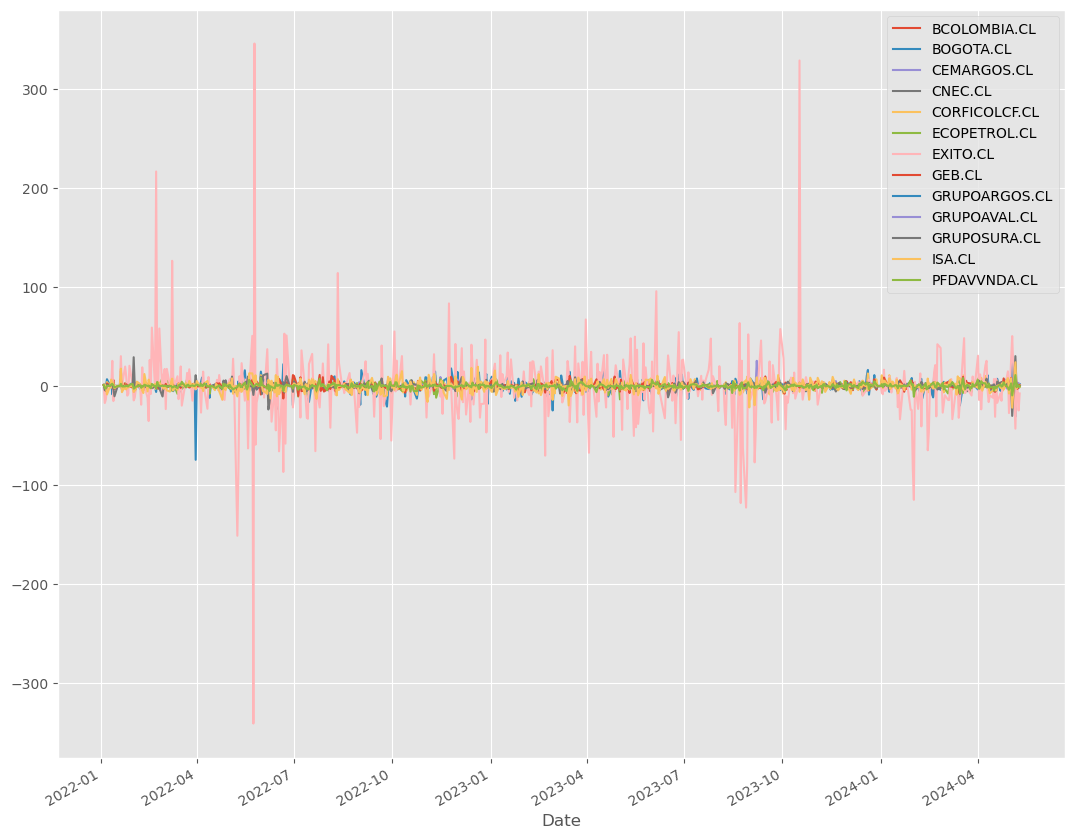

In [10]:
(rendActFinan / rendActFinan.iloc[0]).plot(figsize=(13, 11))

#### Calcula los rendimientos diarios con mean y anualízalos multiplicando por 252 (año bursátil)

In [11]:
rendAnualizados = rendActFinan.mean() * 252

rendAnualizados

BCOLOMBIA.CL     0.094461
BOGOTA.CL       -0.260955
CEMARGOS.CL      0.202612
CNEC.CL         -0.527505
CORFICOLCF.CL   -0.192022
ECOPETROL.CL    -0.009737
EXITO.CL        -0.181939
GEB.CL           0.088289
GRUPOARGOS.CL    0.125624
GRUPOAVAL.CL    -0.259365
GRUPOSURA.CL     0.153927
ISA.CL          -0.039562
PFDAVVNDA.CL    -0.127201
dtype: float64

#### Calcula la matriz de covarianza con cov y anualízalos multiplicando por 252 (año bursátil)

In [12]:
rendActFinan.cov() *252

BCOLOMBIA.CL  BOGOTA.CL  CEMARGOS.CL   CNEC.CL  CORFICOLCF.CL  \
BCOLOMBIA.CL       0.147013   0.017195     0.036064  0.007934       0.035148   
BOGOTA.CL          0.017195   0.199013     0.017066  0.024014       0.025661   
CEMARGOS.CL        0.036064   0.017066     0.157997 -0.002418       0.017742   
CNEC.CL            0.007934   0.024014    -0.002418  0.173598       0.004510   
CORFICOLCF.CL      0.035148   0.025661     0.017742  0.004510       0.115542   
ECOPETROL.CL       0.035196  -0.002497     0.033771  0.031019       0.025741   
EXITO.CL           0.011595   0.007423     0.012273  0.004823       0.004588   
GEB.CL             0.018489   0.011853     0.035458 -0.005866       0.029959   
GRUPOARGOS.CL      0.035900   0.008847     0.054795  0.007633       0.017782   
GRUPOAVAL.CL       0.018871   0.002404    -0.005571  0.000820       0.016631   
GRUPOSURA.CL       0.025692  -0.021444     0.032824 -0.019159       0.011581   
ISA.CL             0.054953   0.003650     0.049192  0.011086       0.035024   
PFDAVVNDA.CL       0.027385   0.009635     0.026230  0.002351       0.028387   

               ECOPETROL.CL  EXITO.CL    GEB.CL  GRUPOARGOS.CL  GRUPOAVAL.CL  \
BCOLOMBIA.CL       0.035196  0.011595  0.018489       0.035900      0.018871   
BOGOTA.CL         -0.002497  0.007423  0.011853       0.008847      0.002404   
CEMARGOS.CL        0.033771  0.012273  0.035458       0.054795     -0.005571   
CNEC.CL            0.031019  0.004823 -0.005866       0.007633      0.000820   
CORFICOLCF.CL      0.025741  0.004588  0.029959       0.017782      0.016631   
ECOPETROL.CL       0.140281  0.019995  0.032531       0.023097      0.001467   
EXITO.CL           0.019995  0.252625  0.003836       0.012610     -0.000992   
GEB.CL             0.032531  0.003836  0.125660       0.030530     -0.002291   
GRUPOARGOS.CL      0.023097  0.012610  0.030530       0.143525      0.007810   
GRUPOAVAL.CL       0.001467 -0.000992 -0.002291       0.007810      0.192630   
GRUPOSURA.CL       0.019514  0.013700  0.035100       0.026674      0.009881   
ISA.CL             0.040921  0.012140  0.032638       0.029805      0.007411   
PFDAVVNDA.CL       0.023333  0.010581  0.034272       0.025842      0.003987   

               GRUPOSURA.CL    ISA.CL  PFDAVVNDA.CL  
BCOLOMBIA.CL       0.025692  0.054953      0.027385  
BOGOTA.CL         -0.021444  0.003650      0.009635  
CEMARGOS.CL        0.032824  0.049192      0.026230  
CNEC.CL           -0.019159  0.011086      0.002351  
CORFICOLCF.CL      0.011581  0.035024      0.028387  
ECOPETROL.CL       0.019514  0.040921      0.023333  
EXITO.CL           0.013700  0.012140      0.010581  
GEB.CL             0.035100  0.032638      0.034272  
GRUPOARGOS.CL      0.026674  0.029805      0.025842  
GRUPOAVAL.CL       0.009881  0.007411      0.003987  
GRUPOSURA.CL       0.333125  0.019968      0.031595  
ISA.CL             0.019968  0.168041      0.023171  
PFDAVVNDA.CL       0.031595  0.023171      0.089312

#### Calcula la matriz de correlación

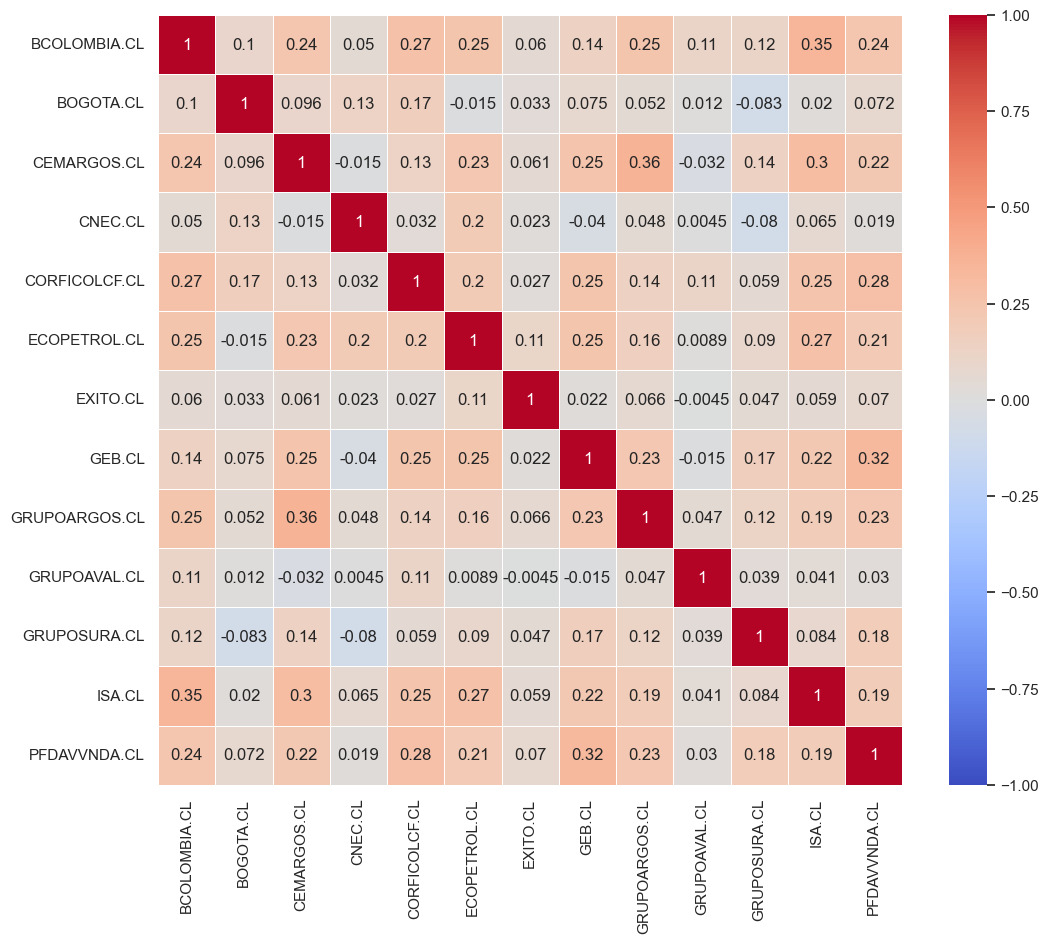

In [13]:
#Matriz de correlación
rendActFinan.corr()

# Configurar el estilo de la matriz de correlación
sns.set(style='white')
# Crear una figura matplotlib
plt.figure(figsize=(12, 10))

# Crear la matriz de correlación con colores
sns.heatmap(rendActFinan.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)


# Mostrar la figura
plt.show()

### **Rendimiento esperado del portafolio**

In [14]:
# Eliminar el elemento 'PEI.CL' usando remove() que tambien se elimino del portafolio
tickers.remove('PEI.CL')
numero_de_tickers = len(tickers)

print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Tickers")
print (tickers)
print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Cant. Tickers")
print (numero_de_tickers)

-------------------------------------------------------------------------------------------------------------------------------
Tickers
['BCOLOMBIA.CL', 'BOGOTA.CL', 'CEMARGOS.CL', 'CNEC.CL', 'CORFICOLCF.CL', 'ECOPETROL.CL', 'EXITO.CL', 'GEB.CL', 'GRUPOARGOS.CL', 'GRUPOAVAL.CL', 'GRUPOSURA.CL', 'ISA.CL', 'PFDAVVNDA.CL']
-------------------------------------------------------------------------------------------------------------------------------
Cant. Tickers
13


#### Calcula los pesos aleatorios

In [17]:
#Pesos aleatorios
weights = np.random.random(numero_de_tickers)

#La suma de los pesos no puede ser mayor a 1
weights /= np.sum(weights)

print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Pesos Aleatorios")
print(weights)
print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Suma total de los Pesos Aleatorios")
print(np.sum(weights))

-------------------------------------------------------------------------------------------------------------------------------
Pesos Aleatorios
[0.03987022 0.12494357 0.14059327 0.03678178 0.02983754 0.03790513
 0.0255923  0.0104458  0.14888825 0.10844724 0.17450928 0.06110095
 0.06108468]
-------------------------------------------------------------------------------------------------------------------------------
Suma total de los Pesos Aleatorios
1.0


#### Calcula el rendimiento anualizado del portafolio con los pesos aleatorios

In [18]:
#Rendimiento anualizado
np.sum(rendActFinan.mean() * weights) * 252

-0.022336780472904254

### Varianza y Desviación Estándar esperada del portafolio

In [19]:
#Varianza esperada del portafolio
print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("La varianza esperada del portafolio es:")
print (np.dot(weights.T, np.dot(rendActFinan.cov() * 252, weights)))

print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("La desviación estándar esperada es:")
print (np.sqrt(np.dot(weights.T, np.dot(rendActFinan.cov() * 252, weights))))

-------------------------------------------------------------------------------------------------------------------------------
La varianza esperada del portafolio es:
0.03898295069138011
-------------------------------------------------------------------------------------------------------------------------------
La desviación estándar esperada es:
0.1974410055975711


### **Generar "n" portafolios con simulaciones Monte Carlo**

In [20]:
portafolio_rendimientos = []
portafolio_riesgo = []
for p in range (1000000):
#Calcula los pesos aleatorios
    weights = np.random.random(numero_de_tickers)
    weights /= np.sum(weights)
#Calcula el rendimiento anualizado del portafolio con los pesos aleatorios
    portafolio_rendimientos.append(np.sum(rendActFinan.mean() * weights) * 252)
    portafolio_riesgo.append(np.sqrt(np.dot(weights.T,
        np.dot(rendActFinan.cov() * 252, weights))))

lista_rendimientos = pd.DataFrame(portafolio_rendimientos)
lista_riesgo = pd.DataFrame(portafolio_riesgo)
#lista_pesos=pd.DataFrame(weights)
portafolio_rendimientos = np.array(portafolio_rendimientos)
portafolio_riesgo = np.array(portafolio_riesgo)

In [21]:
RR = ['Rendimiento', 'Riesgo']
rend_riesgo=pd.concat([lista_rendimientos,lista_riesgo], axis=1)
rend_riesgo.columns= RR

rend_riesgo

Rendimiento    Riesgo
0         -0.070651  0.192471
1         -0.050666  0.180121
2         -0.057825  0.187147
3         -0.104446  0.175684
4         -0.084345  0.188964
...             ...       ...
999995    -0.091393  0.175738
999996    -0.102213  0.174808
999997    -0.072443  0.186176
999998    -0.091216  0.175823
999999    -0.036676  0.189901

[1000000 rows x 2 columns]

In [22]:
pesos=np.array(weights)

In [23]:
print(pesos)

[0.07668456 0.03542983 0.09642869 0.00839197 0.11411904 0.0801086
 0.12050971 0.02032691 0.11515784 0.10031471 0.08172254 0.12773198
 0.02307362]


In [24]:
# Valor máximo y mínimo por columna
maximo_valor_columnaREND = lista_rendimientos.max()
minimo_valor_columnaREND = lista_rendimientos.min()

maximo_valor_columnaRIES = lista_riesgo.max()
minimo_valor_columnaRIES = lista_riesgo.min()

# Imprimir los resultados por columna
print("\nValores máximos por columna:")
print(maximo_valor_columnaREND)
print(maximo_valor_columnaRIES)

print("\nValores mínimos por columna:")
print(minimo_valor_columnaREND)
print(minimo_valor_columnaRIES)


Valores máximos por columna:
0    0.089185
dtype: float64
0    0.259696
dtype: float64

Valores mínimos por columna:
0   -0.247783
dtype: float64
0    0.165744
dtype: float64


#### Incorpora la tasa libre de riesgo

In [25]:
##
import datetime
from pandas.tseries.offsets import BDay

today = datetime.datetime.today()
previous_business_date = today - BDay(1)
previous_business_date

rf = yf.download('^TNX', '2022-01-01')['Adj Close']
rf = rf / 100

[*********************100%%**********************]  1 of 1 completed


In [26]:
## Diferencia entre rendimiento y tasa libre de riesgo
portafolio_rendimientos = portafolio_rendimientos - rf[0]

#### Genera el Sharpe Ratio
El Sharpe Ratio permite medir la relación riesgo-rendimiento, es decir, el exceso esperado por el rendimiento del portafolio sobre la tasa libre de riesgo  𝑟𝑓
  de corto plazo, dividida entre la desviación estándar (riesgo) del portafolio.

Por simplicidad, se asume  𝑟𝑓=0
 , aunque en este ejemplo, se descuenta la tasa libre de riesgo diaria de los bonos del tesoro de Estados Unidos a 10 años.

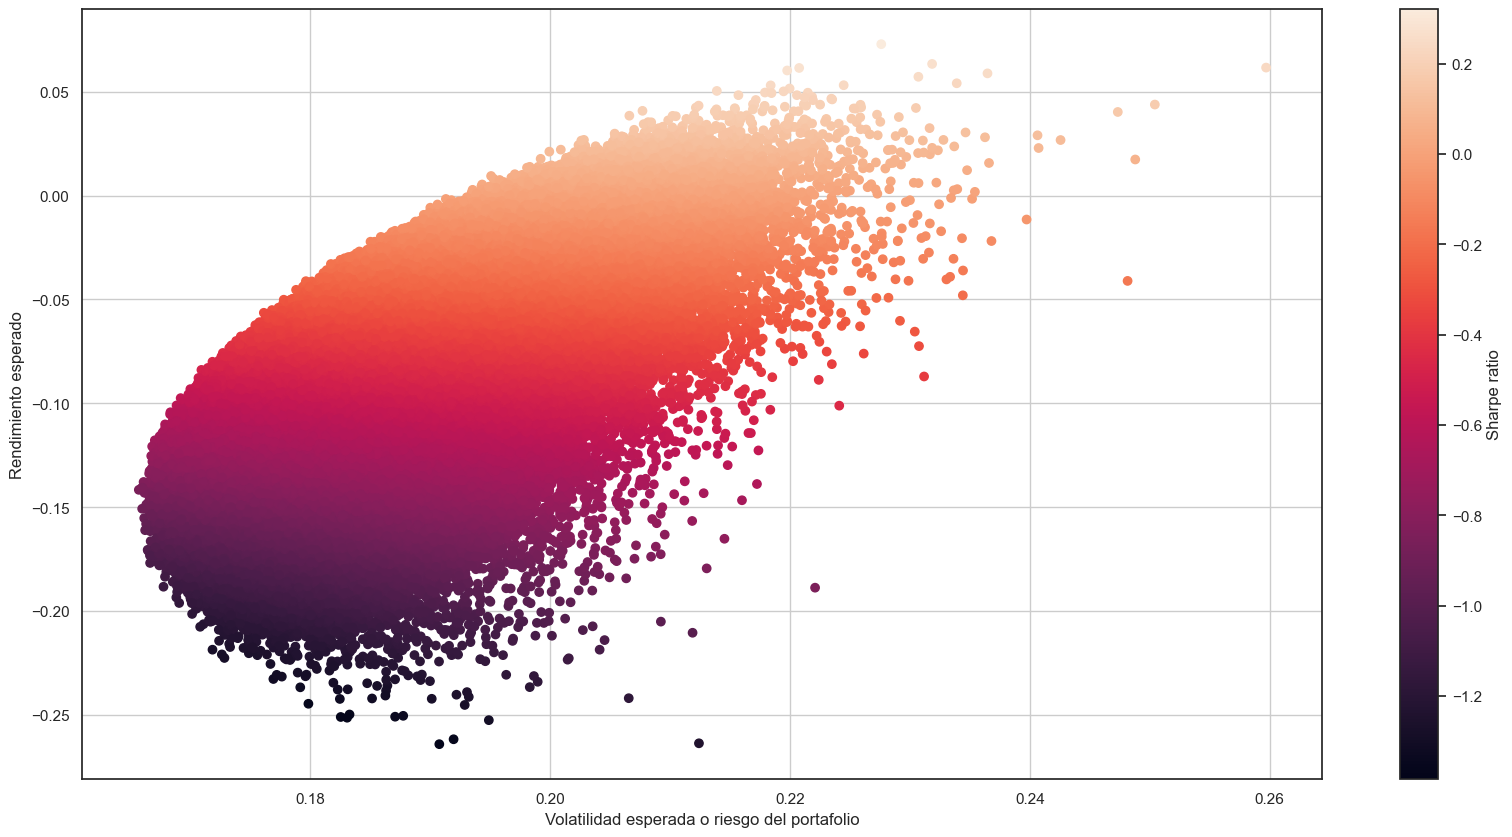

In [27]:
#
plt.figure(figsize=(20, 10))
plt.scatter(portafolio_riesgo,
            portafolio_rendimientos,
            c=portafolio_rendimientos/ portafolio_riesgo, #Sharpe Ratio
            marker='o')
plt.grid(True)
plt.xlabel('Volatilidad esperada o riesgo del portafolio')
plt.ylabel('Rendimiento esperado')
plt.colorbar(label='Sharpe ratio')


### **Optimización del portafolio**

In [28]:
#Se meten en una función los elementos del portafolio
def statistics(weights):
  weights = np.array(weights)
  portafolio_rendimientos = np.sum(rendActFinan.mean() * weights) * 252
  portafolio_riesgo = np.sqrt(np.dot(weights.T, np.dot(rendActFinan.cov() * 252, weights)))
  return np.array([portafolio_rendimientos, portafolio_riesgo, portafolio_rendimientos / portafolio_riesgo])

In [29]:
#La derivación de los portafolios óptimos es un problema de optimización con restricciones en donde se utilizará la función 
#minimizar de la librearía scipy.optimize
import scipy.optimize as sco

#################################
def min_func_sharpe(weights):
  return -statistics(weights)[2]

#Recordar que una restricción en los portafolios de Markowitz es que todos los parámetros (pesos) suman 1. Esto se puede 
#formular utilizando una función de minimización:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})


#También vinculamos los valores de los parámetros (pesos) para que estén entre 0 y 1. La función puede quedar con una tupla:
bnds = tuple((0, 1) for x in range(numero_de_tickers))


#La única entrada que falta para optimizar es un parámetro inicial (estimaciones iniciales para los pesos). Simplemente 
#partimos de una distribución igual:
numero_de_tickers * [1. / numero_de_tickers,]


[0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693]

#### Mejor portafolio de Sharpe
Llamar a la función devuelve no solo los valores óptimos de los parámetros, sino que también permite almacenar los resultados en un objeto que llamaremos "opts"

La función ***scp.minimize*** permite minimizar la función escalar de una o más variables.

**SLSQP** es un método de Programación cuadrática secuencial (SQP): reemplaza el problema original con una secuencia de problemas cuadráticos cuyo objetivo son aproximaciones de segundo orden del Lagrangiano y cuyas restricciones son las restricciones originales linealizadas.


In [30]:
%%time
opts = sco.minimize(min_func_sharpe, numero_de_tickers * [1. / numero_de_tickers,], method='SLSQP',
bounds=bnds, constraints=cons)

opts

CPU times: total: 172 ms
Wall time: 83.7 ms


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.5762592265072433
       x: [ 1.132e-01  0.000e+00 ...  0.000e+00  1.175e-16]
     nit: 7
     jac: [ 2.679e-04  1.019e+00 ...  4.524e-01  6.717e-01]
    nfev: 99
    njev: 7

### Portafolio óptimo (Sharpe)

In [31]:
#Nuestro principal interés radica en conseguir la composición óptima del portafolio.
print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("El portafolio óptimo es el siguiente:")
print(opts['x'].round(4))

#######################################################################################
print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Su rendimiento, riesgo y Sharpe Ratio son:")
print(statistics(opts['x']).round(4))

-------------------------------------------------------------------------------------------------------------------------------
El portafolio óptimo es el siguiente:
[0.1132 0.     0.4801 0.     0.     0.     0.     0.1065 0.1588 0.
 0.1415 0.     0.    ]
-------------------------------------------------------------------------------------------------------------------------------
Su rendimiento, riesgo y Sharpe Ratio son:
[0.1591 0.2761 0.5763]


#### Portafolio de Mínima Varianza
Se repite el proceso, solo que ahora se busca minimizar a partir de la columan de volatilidad.

In [32]:
################################################
def min_func_varianza(weights):
  return statistics(weights)[1] ** 2


##############################################
optv = sco.minimize(min_func_varianza, numero_de_tickers * [1. / numero_de_tickers,],
method='SLSQP', bounds=bnds,
constraints=cons)

optv

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.027171589250639637
       x: [ 2.925e-02  8.864e-02 ...  3.386e-02  1.358e-01]
     nit: 9
     jac: [ 5.429e-02  5.427e-02 ...  5.441e-02  5.424e-02]
    nfev: 126
    njev: 9

### Portafolio óptimo (Mínima Varianza)

In [33]:
print ("-------------------------------------------------------------------------------------------------------------------------------")
print(optv['x'].round(4))

#######################################################################################
print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Su rendimiento, riesgo y Sharpe Ratio son:")
print(statistics(optv['x']).round(4))

-------------------------------------------------------------------------------------------------------------------------------
[0.0292 0.0886 0.0536 0.1315 0.0815 0.0489 0.0797 0.0908 0.0586 0.1229
 0.0449 0.0339 0.1358]
-------------------------------------------------------------------------------------------------------------------------------
Su rendimiento, riesgo y Sharpe Ratio son:
[-0.1377  0.1648 -0.8352]


#### Frontera eficiente
La frontera eficiente representa todas las combinaciones de puntos que reflejan la menor varianza posible para un nivel dado de rendimiento esperado.

Se retoman dos condiciones:

1) Sumatoria de los pesos = 1

2) Se utilizan los rendimientos, riesgos y Sharpes calculados

In [34]:
cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret},
{'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)


##################################################################
def min_func_port(weights):
  return statistics(weights)[1]


In [35]:
#Se agrega el elemento "trets" para optimizar con diferentes niveles de rendimiento
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
  cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret},
  {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
  res = sco.minimize(min_func_port, numero_de_tickers * [1. / numero_de_tickers,], method='SLSQP',
  bounds=bnds, constraints=cons)
  tvols.append(res['fun'])
tvols = np.array(tvols)



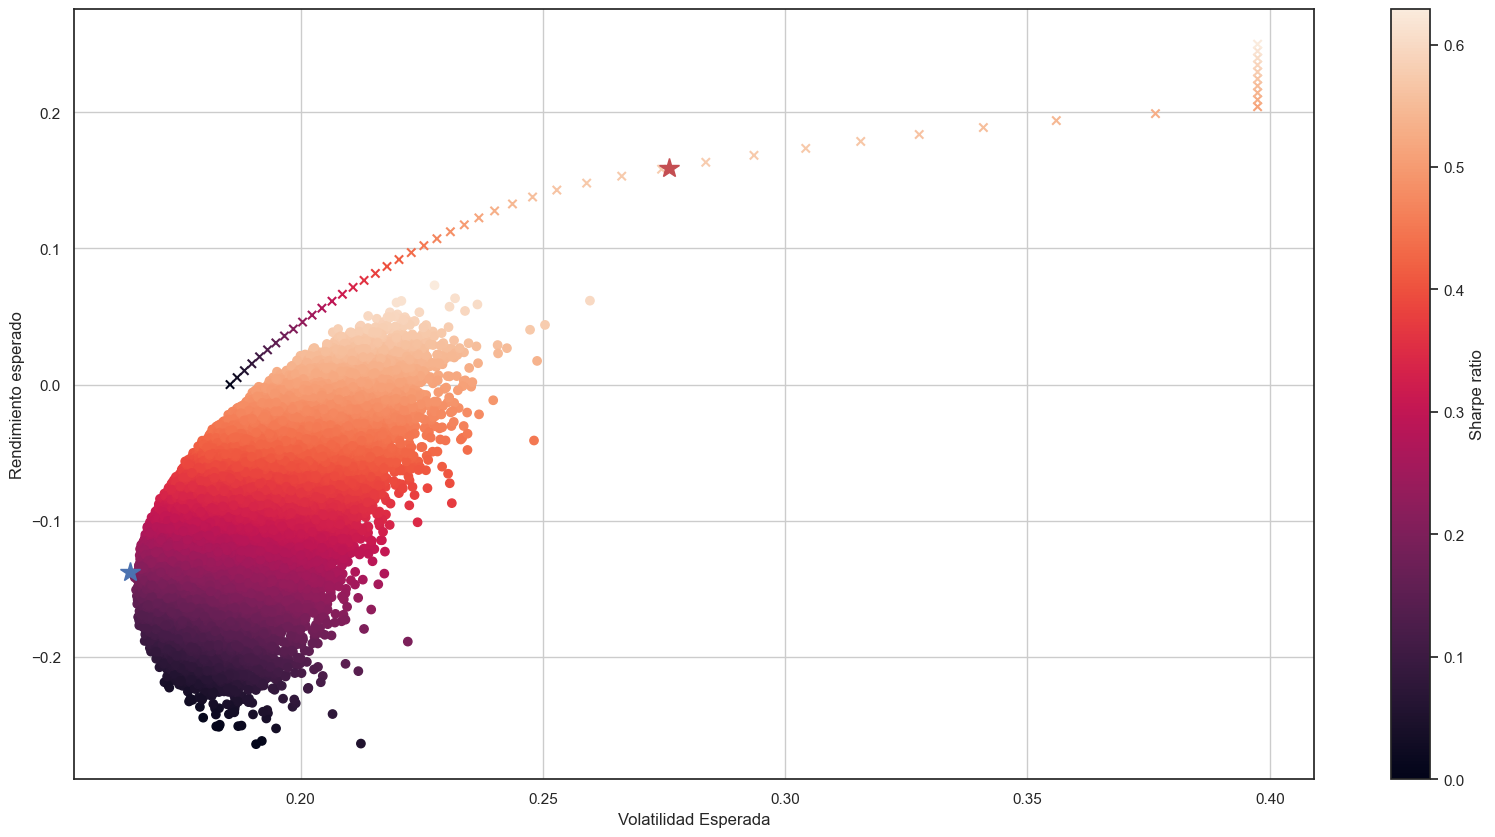

In [39]:
plt.figure(figsize=(20, 10))
plt.scatter(portafolio_riesgo,
            portafolio_rendimientos,
            c=portafolio_rendimientos/ portafolio_riesgo,
            marker='o')
# Portafolio con pesos aleatorios
plt.scatter(tvols, trets,
c=trets / tvols, marker='x') # Frontera eficiente
# Mejor portafolio de Sharpe
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
'r*', markersize=15.0)




# Portafolio de mínima varianza
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
'b*', markersize=15.0)
plt.grid(True)
plt.xlabel('Volatilidad Esperada')
plt.ylabel('Rendimiento esperado')
plt.colorbar(label='Sharpe ratio')

In [38]:
print ("Conclusión Escenario 1:")
print ("-------------------------------------------------------------------------------------------------------------------------------")

ActivosFiancieros = pd.DataFrame(tickers)
portSharpeR = pd.DataFrame(opts['x'].round(4))
portMinVar = pd.DataFrame(optv['x'].round(4))

PORTAFOLIOS_OPT = ['Activo Financiero', 'Port. de Sharpe Ratio', 'Port. de Mínima Varianza']
ESCEN_I=pd.concat([ActivosFiancieros, portSharpeR, portMinVar], axis=1)
ESCEN_I.columns= PORTAFOLIOS_OPT

print(ESCEN_I)

print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Rendimiento, Riesgo y Sharpe Ratio - Portafolio óptimo Share Ratio:")
print(statistics(opts['x']).round(4))

print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Rendimiento, Riesgo y Sharpe Ratio - Portafolio Mínima Varianza:")
print(statistics(optv['x']).round(4))

Conclusión Escenario 1:
-------------------------------------------------------------------------------------------------------------------------------
   Activo Financiero  Port. de Sharpe Ratio  Port. de Mínima Varianza
0       BCOLOMBIA.CL                 0.1132                    0.0292
1          BOGOTA.CL                 0.0000                    0.0886
2        CEMARGOS.CL                 0.4801                    0.0536
3            CNEC.CL                 0.0000                    0.1315
4      CORFICOLCF.CL                 0.0000                    0.0815
5       ECOPETROL.CL                 0.0000                    0.0489
6           EXITO.CL                 0.0000                    0.0797
7             GEB.CL                 0.1065                    0.0908
8      GRUPOARGOS.CL                 0.1588                    0.0586
9       GRUPOAVAL.CL                 0.0000                    0.1229
10      GRUPOSURA.CL                 0.1415                    0.0449
11      

## Escenario 2
En este segundo test el portafolio estará compuesto por los activos financieros que tuvieron un rendimiento anual positivo en el escenario 1.

In [179]:
tickers2 = ['BCOLOMBIA.CL','CEMARGOS.CL','GEB.CL','GRUPOARGOS.CL','GRUPOSURA.CL']
numero_de_tickers2 = len(tickers2)

## 
print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Tickers")
print (tickers2)
print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Cant. Tickers")
print (numero_de_tickers2)
print ("-------------------------------------------------------------------------------------------------------------------------------")


-------------------------------------------------------------------------------------------------------------------------------
Tickers
['BCOLOMBIA.CL', 'CEMARGOS.CL', 'GEB.CL', 'GRUPOARGOS.CL', 'GRUPOSURA.CL']
-------------------------------------------------------------------------------------------------------------------------------
Cant. Tickers
5
-------------------------------------------------------------------------------------------------------------------------------


In [180]:
data_ActFinancieros2 = pd.DataFrame()
data_ActFinancieros2 = yf.download(tickers2,'2022-01-01')['Adj Close']

data_ActFinancieros2.head(20)

[*********************100%%**********************]  5 of 5 completed


BCOLOMBIA.CL  CEMARGOS.CL       GEB.CL  GRUPOARGOS.CL  \
Date                                                                
2022-01-03  27607.396484  5241.722168  2043.174438   11967.039062   
2022-01-04  27879.470703  5296.897949  2057.699219   11967.039062   
2022-01-05  27207.289062  5292.653320  2034.297974   11834.072266   
2022-01-06  27095.263672  5135.613770  1964.901001   11417.443359   
2022-01-07  27367.333984  5262.943359  2001.213623   12100.005859   
2022-01-10  27367.333984  5262.943359  2001.213623   12100.005859   
2022-01-11  27847.458984  5356.318359  2023.807983   12277.294922   
2022-01-12  28311.585938  5356.318359  2081.907715   12764.841797   
2022-01-13  30088.060547  5339.341309  2039.139648   13252.387695   
2022-01-14  29191.822266  5237.477539  1997.178711   12605.280273   
2022-01-17  29191.822266  5237.477539  1997.178711   12605.280273   
2022-01-18  29191.822266  5237.477539  1997.178711   12605.280273   
2022-01-19  29191.822266  5237.477539  1997.178711   12605.280273   
2022-01-20  32248.638672  5585.510254  2103.694824   14493.414062   
2022-01-21  31088.328125  5462.425781  2089.977295   14050.191406   
2022-01-24  32008.578125  5470.913574  2102.081299   13997.004883   
2022-01-25  31848.533203  5470.913574  2129.517090   13846.307617   
2022-01-26  31208.359375  5377.539551  2138.393311   13819.715820   
2022-01-27  31288.384766  5369.050293  2138.393311   13864.037109   
2022-01-28  31696.490234  5398.761230  2138.393311   14094.512695   

            GRUPOSURA.CL  
Date                      
2022-01-03  27902.093750  
2022-01-04  28182.046875  
2022-01-05  27006.240234  
2022-01-06  26772.943359  
2022-01-07  27174.210938  
2022-01-10  27174.210938  
2022-01-11  28387.345703  
2022-01-12  28928.587891  
2022-01-13  28200.710938  
2022-01-14  25429.164062  
2022-01-17  25429.164062  
2022-01-18  25429.164062  
2022-01-19  25429.164062  
2022-01-20  25429.164062  
2022-01-21  25429.164062  
2022-01-24  25429.164062  
2022-01-25  25429.164062  
2022-01-26  25429.164062  
2022-01-27  25429.164062  
2022-01-28  25429.164062

In [181]:
data_ActFinancieros2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 614 entries, 2022-01-03 to 2024-05-10
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BCOLOMBIA.CL   612 non-null    float64
 1   CEMARGOS.CL    612 non-null    float64
 2   GEB.CL         612 non-null    float64
 3   GRUPOARGOS.CL  614 non-null    float64
 4   GRUPOSURA.CL   613 non-null    float64
dtypes: float64(5)
memory usage: 28.8 KB


In [182]:
#Se eliminan las filas con NaN
data_ActFinancieros2 = data_ActFinancieros2.dropna()


data_ActFinancieros2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 611 entries, 2022-01-03 to 2024-05-10
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BCOLOMBIA.CL   611 non-null    float64
 1   CEMARGOS.CL    611 non-null    float64
 2   GEB.CL         611 non-null    float64
 3   GRUPOARGOS.CL  611 non-null    float64
 4   GRUPOSURA.CL   611 non-null    float64
dtypes: float64(5)
memory usage: 28.6 KB


<Axes: xlabel='Date'>

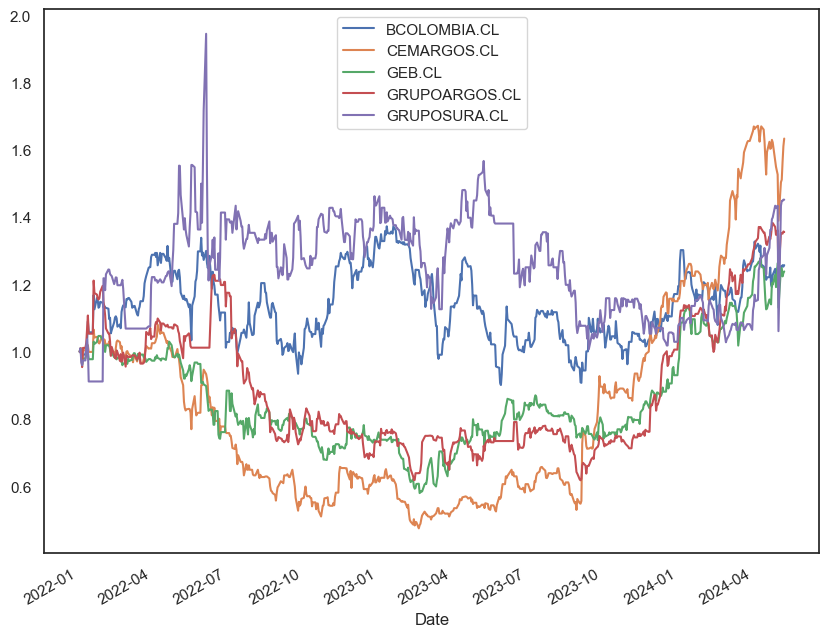

In [183]:
### Normaliza las cotizaciones para hacerlas comparables en un gráfico
(data_ActFinancieros2 / data_ActFinancieros2.iloc[0]).plot(figsize=(10, 8))

In [184]:
#Obtener los rendimientos, rendimientos anualizados y matriz de varianza-covarianza
rendActFinan2 = np.log(data_ActFinancieros2 / data_ActFinancieros2.shift(1))

rendActFinan2 = rendActFinan2.dropna()

###Calcula los rendimientos diarios con mean y anualízalos multiplicando por 252 (año bursátil)
rendAnualizados2 = rendActFinan2.mean() * 252

rendAnualizados2

BCOLOMBIA.CL     0.094461
CEMARGOS.CL      0.202612
GEB.CL           0.088289
GRUPOARGOS.CL    0.125624
GRUPOSURA.CL     0.153927
dtype: float64

In [185]:
#Calcula la matriz de covarianza con cov y anualízalos multiplicando por 252 (año bursátil)
rendAnualizados_cov2 = rendActFinan2.cov() *252


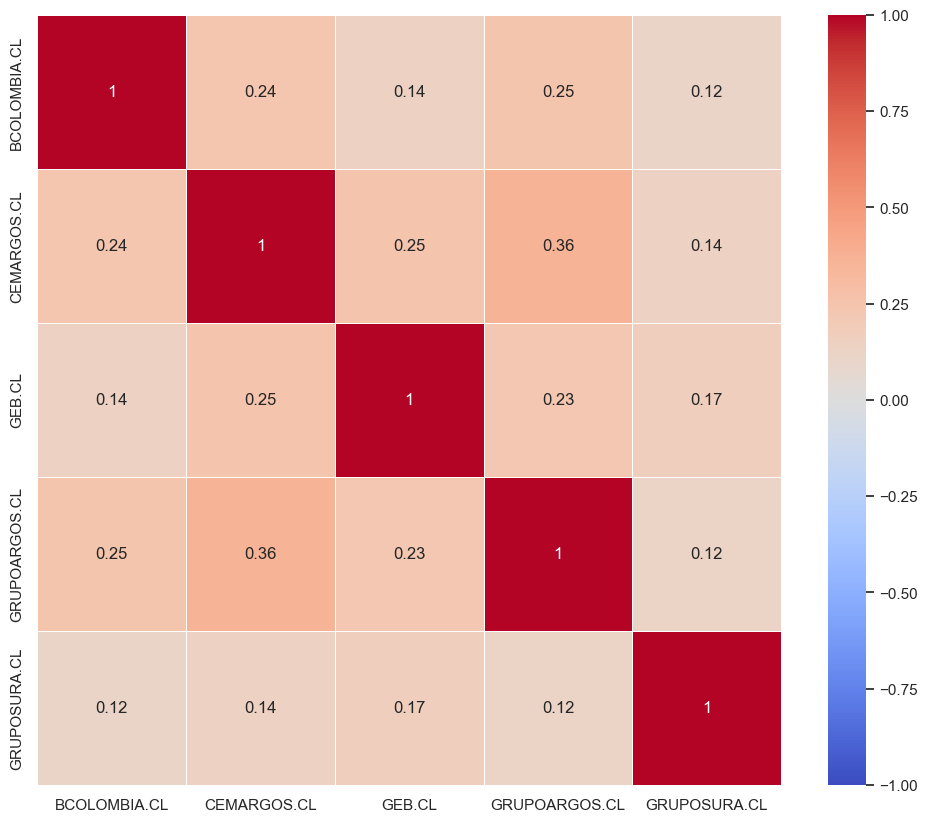

In [186]:
# Calculo matriz de correlación

#Matriz de correlación
rendActFinan2.corr()

# Configurar el estilo de la matriz de correlación
sns.set(style='white')
# Crear una figura matplotlib
plt.figure(figsize=(12, 10))

# Crear la matriz de correlación con colores
sns.heatmap(rendActFinan2.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)


# Mostrar la figura
plt.show()

### **Rendimiento esperado del portafolio**

In [187]:
# Calculo psos aleatorios

#Pesos aleatorios
weights2 = np.random.random(numero_de_tickers2)

#La suma de los pesos no puede ser mayor a 1
weights2 /= np.sum(weights2)

print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Pesos Aleatorios")
print(weights2)
print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Suma total de los Pesos Aleatorios")
print(np.sum(weights2))

-------------------------------------------------------------------------------------------------------------------------------
Pesos Aleatorios
[0.07776599 0.15153734 0.10077631 0.28874651 0.38117384]
-------------------------------------------------------------------------------------------------------------------------------
Suma total de los Pesos Aleatorios
1.0


In [188]:
#Calcula el rendimiento anualizado del portafolio con los pesos aleatorios
#Rendimiento anualizado
np.sum(rendActFinan2.mean() * weights2) * 252

0.14189277782184914

### Varianza y Desviación Estándar esperada del portafolio

In [189]:
#Varianza esperada del portafolio
print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("La varianza esperada del portafolio es:")
print (np.dot(weights2.T, np.dot(rendActFinan2.cov() * 252, weights2)))

print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("La desviación estándar esperada es:")
print (np.sqrt(np.dot(weights2.T, np.dot(rendActFinan2.cov() * 252, weights2))))

-------------------------------------------------------------------------------------------------------------------------------
La varianza esperada del portafolio es:
0.09045113472651942
-------------------------------------------------------------------------------------------------------------------------------
La desviación estándar esperada es:
0.30075095133102975


### **Generar "n" portafolios con simulaciones Monte Carlo**

In [190]:
portafolio_rendimientos2 = []
portafolio_riesgo2 = []
for p in range (1000000):
    weights2 = np.random.random(numero_de_tickers2)
    weights2 /= np.sum(weights2)
    portafolio_rendimientos2.append(np.sum(rendActFinan2.mean() * weights2) * 252)
    portafolio_riesgo2.append(np.sqrt(np.dot(weights2.T,
        np.dot(rendActFinan2.cov() * 252, weights2))))

lista_rendimientos2 = pd.DataFrame(portafolio_rendimientos2)
lista_riesgo2 = pd.DataFrame(portafolio_riesgo2)
#lista_pesos=pd.DataFrame(weights)
portafolio_rendimientos2 = np.array(portafolio_rendimientos2)
portafolio_riesgo2 = np.array(portafolio_riesgo2)


############
RR2 = ['Rendimiento', 'Riesgo']
rend_riesgo2=pd.concat([lista_rendimientos2,lista_riesgo2], axis=1)
rend_riesgo2.columns= RR2

rend_riesgo2

Rendimiento    Riesgo
0          0.152025  0.286257
1          0.134288  0.256578
2          0.155801  0.275572
3          0.125596  0.248188
4          0.130504  0.262630
...             ...       ...
999995     0.125230  0.258290
999996     0.124465  0.328795
999997     0.138173  0.275055
999998     0.125197  0.285081
999999     0.133718  0.248045

[1000000 rows x 2 columns]

In [191]:
# Valor máximo y mínimo por columna
maximo_valor_columnaREND2 = lista_rendimientos2.max()
minimo_valor_columnaREND2 = lista_rendimientos2.min()

maximo_valor_columnaRIES2 = lista_riesgo2.max()
minimo_valor_columnaRIES2 = lista_riesgo2.min()

# Imprimir los resultados por columna
print("\nValores máximos por columna:")
print(maximo_valor_columnaREND2)
print(maximo_valor_columnaRIES2)

print("\nValores mínimos por columna:")
print(minimo_valor_columnaREND2)
print(minimo_valor_columnaRIES2)


Valores máximos por columna:
0    0.192483
dtype: float64
0    0.530451
dtype: float64

Valores mínimos por columna:
0    0.091309
dtype: float64
0    0.240313
dtype: float64


In [192]:
# Se incorpora tasa libre de riesgo
##
import datetime
from pandas.tseries.offsets import BDay

today = datetime.datetime.today()
previous_business_date = today - BDay(1)
previous_business_date

rf = yf.download('^TNX', '2022-01-01')['Adj Close']
rf = rf / 100

[*********************100%%**********************]  1 of 1 completed


In [193]:
## Diferencia entre rendimiento y tasa libre de riesgo
portafolio_rendimientos2 = portafolio_rendimientos2 - rf[0]

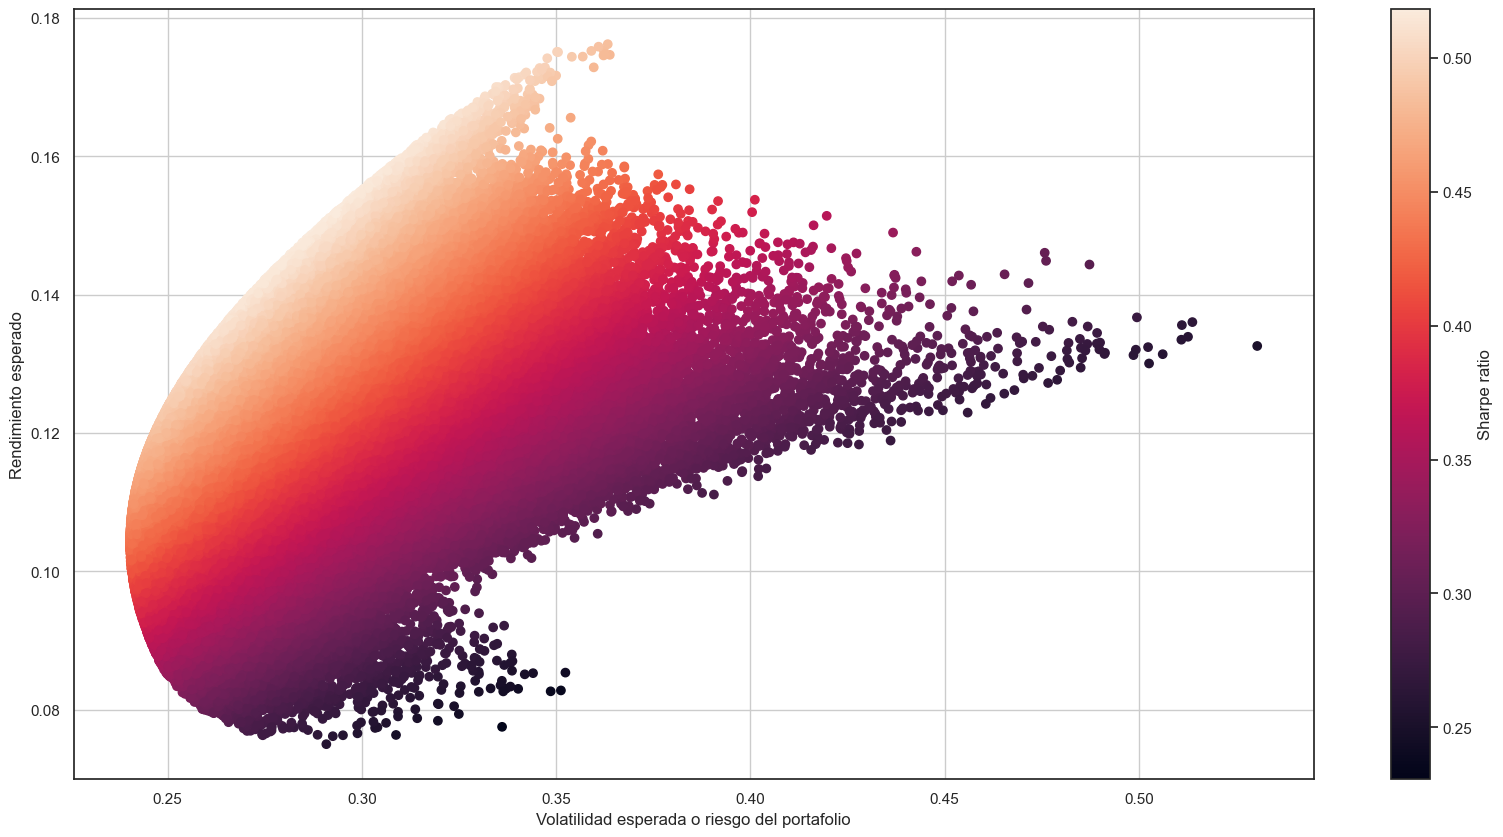

In [194]:
#Se genera el Sharpe Ratio
#
plt.figure(figsize=(20, 10))
plt.scatter(portafolio_riesgo2,
            portafolio_rendimientos2,
            c=portafolio_rendimientos2/ portafolio_riesgo2, #Sharpe Ratio
            marker='o')
plt.grid(True)
plt.xlabel('Volatilidad esperada o riesgo del portafolio')
plt.ylabel('Rendimiento esperado')
plt.colorbar(label='Sharpe ratio')

### Optimización del portafolio

In [195]:
#Se meten en una función los elementos del portafolio
def statistics(weights2):
  weights2 = np.array(weights2)
  portafolio_rendimientos2 = np.sum(rendActFinan2.mean() * weights2) * 252
  portafolio_riesgo2 = np.sqrt(np.dot(weights2.T, np.dot(rendActFinan2.cov() * 252, weights2)))
  return np.array([portafolio_rendimientos2, portafolio_riesgo2, portafolio_rendimientos2 / portafolio_riesgo2])

In [196]:
#La derivación de los portafolios óptimos es un problema de optimización con restricciones en donde se utilizará la función 
#minimizar de la librearía scipy.optimize
import scipy.optimize as sco

#################################
def min_func_sharpe(weights2):
  return -statistics(weights2)[2]

#Recordar que una restricción en los portafolios de Markowitz es que todos los parámetros (pesos) suman 1. Esto se puede 
#formular utilizando una función de minimización:
cons2 = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})


#También vinculamos los valores de los parámetros (pesos) para que estén entre 0 y 1. La función puede quedar con una tupla:
bnds2 = tuple((0, 1) for x in range(numero_de_tickers2))


#La única entrada que falta para optimizar es un parámetro inicial (estimaciones iniciales para los pesos). Simplemente 
#partimos de una distribución igual:
numero_de_tickers2 * [1. / numero_de_tickers2,]

[0.2, 0.2, 0.2, 0.2, 0.2]

#### Mejor portafolio Sharpe

In [197]:
%%time
opts2 = sco.minimize(min_func_sharpe, numero_de_tickers2 * [1. / numero_de_tickers2,], method='SLSQP',
bounds=bnds2, constraints=cons2)

opts2

CPU times: total: 15.6 ms
Wall time: 23.5 ms


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.5762591367581227
       x: [ 1.133e-01  4.803e-01  1.062e-01  1.588e-01  1.414e-01]
     nit: 5
     jac: [ 6.293e-04  2.513e-04 -5.258e-04  3.588e-04 -1.376e-03]
    nfev: 31
    njev: 5

### Portafolio óptimo (Sharpe)

In [198]:
#Nuestro principal interés radica en conseguir la composición óptima del portafolio.
print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("El portafolio óptimo es el siguiente:")
print(opts2['x'].round(4))

#######################################################################################
print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Su rendimiento, riesgo y Sharpe Ratio son:")
print(statistics(opts2['x']).round(4))

-------------------------------------------------------------------------------------------------------------------------------
El portafolio óptimo es el siguiente:
[0.1133 0.4803 0.1062 0.1588 0.1414]
-------------------------------------------------------------------------------------------------------------------------------
Su rendimiento, riesgo y Sharpe Ratio son:
[0.1591 0.2761 0.5763]


#### Portafolio de Mínima Varianza

In [199]:
################################################
def min_func_varianza(weights2):
  return statistics(weights2)[1] ** 2


##############################################
optv2 = sco.minimize(min_func_varianza, numero_de_tickers2 * [1. / numero_de_tickers2,],
method='SLSQP', bounds=bnds2,
constraints=cons2)

optv2

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.05774854169765638
       x: [ 2.536e-01  1.512e-01  3.058e-01  1.991e-01  9.039e-02]
     nit: 6
     jac: [ 1.157e-01  1.155e-01  1.154e-01  1.154e-01  1.153e-01]
    nfev: 36
    njev: 6

### Portafolio óptimo (Mínima Varianza)

In [200]:
print ("-------------------------------------------------------------------------------------------------------------------------------")
print(optv2['x'].round(4))

#######################################################################################
print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Su rendimiento, riesgo y Sharpe Ratio son:")
print(statistics(optv2['x']).round(4))

-------------------------------------------------------------------------------------------------------------------------------
[0.2536 0.1512 0.3058 0.1991 0.0904]
-------------------------------------------------------------------------------------------------------------------------------
Su rendimiento, riesgo y Sharpe Ratio son:
[0.1205 0.2403 0.5014]


#### Frontera Eficiente

In [201]:
cons2 = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret},
{'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds2 = tuple((0, 1) for x in weights2)


##################################################################
def min_func_port(weights2):
  return statistics(weights2)[1]


In [203]:
#Se agrega el elemento "trets" para optimizar con diferentes niveles de rendimiento
trets2 = np.linspace(0.0, 0.25, 50)
tvols2 = []
for tret in trets2:
  cons2 = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret},
  {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
  res2 = sco.minimize(min_func_port, numero_de_tickers2 * [1. / numero_de_tickers2,], method='SLSQP',
  bounds=bnds2, constraints=cons2)
  tvols2.append(res2['fun'])
tvols2 = np.array(tvols2)

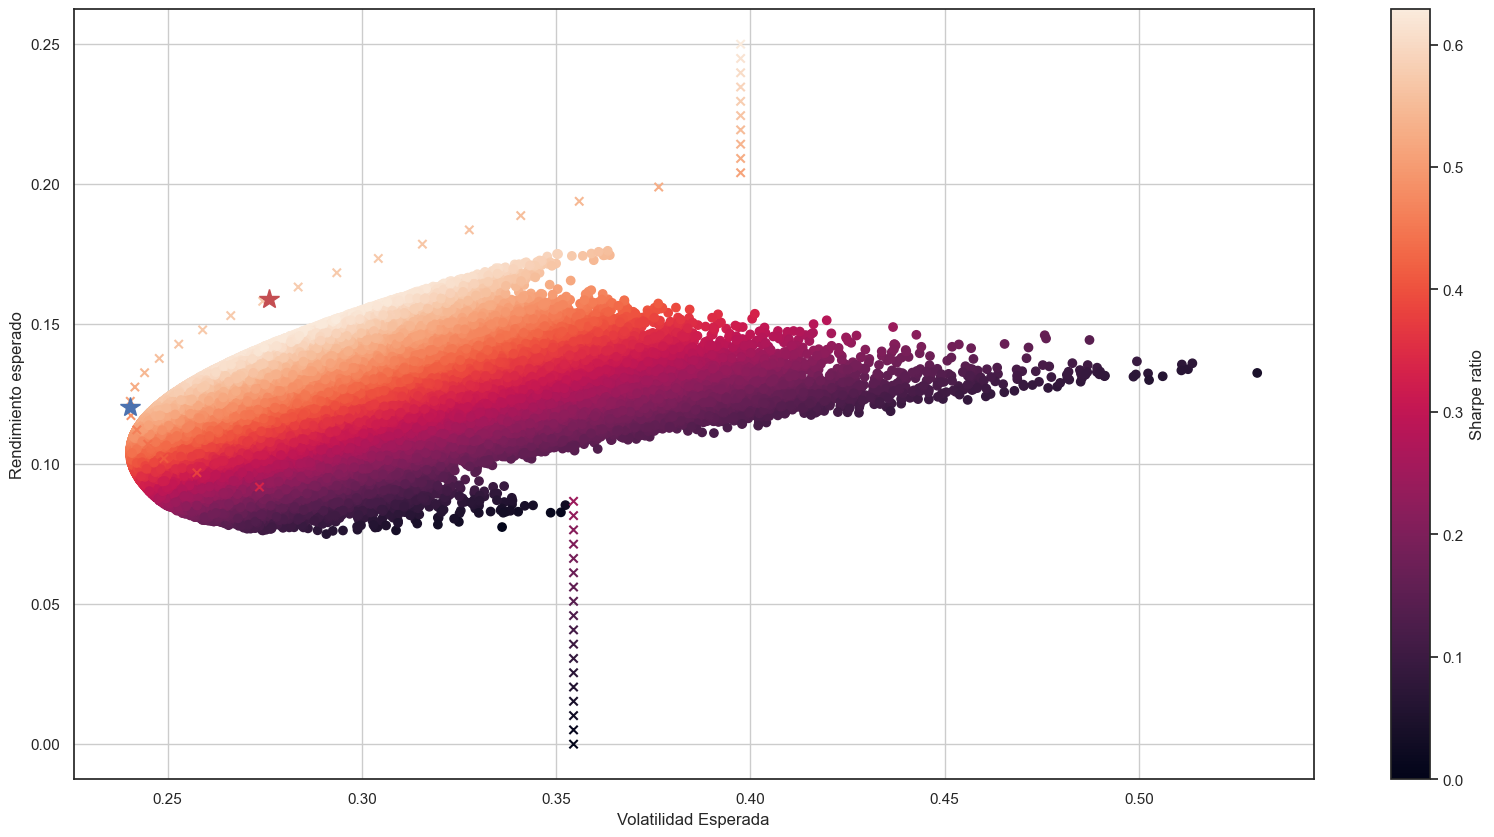

In [204]:
plt.figure(figsize=(20, 10))
plt.scatter(portafolio_riesgo2,
            portafolio_rendimientos2,
            c=portafolio_rendimientos2/ portafolio_riesgo2,
            marker='o')
# Portafolio con pesos aleatorios
plt.scatter(tvols2, trets2,
c=trets2 / tvols2, marker='x') # Frontera eficiente
# Mejor portafolio de Sharpe
plt.plot(statistics(opts2['x'])[1], statistics(opts2['x'])[0],
'r*', markersize=15.0)




# Portafolio de mínima varianza
plt.plot(statistics(optv2['x'])[1], statistics(optv2['x'])[0],
'b*', markersize=15.0)
plt.grid(True)
plt.xlabel('Volatilidad Esperada')
plt.ylabel('Rendimiento esperado')
plt.colorbar(label='Sharpe ratio')

In [205]:
print ("Conclusión Escenario 2:")
print ("-------------------------------------------------------------------------------------------------------------------------------")

ActivosFiancieros = pd.DataFrame(tickers2)
portSharpeR = pd.DataFrame(opts2['x'].round(4))
portMinVar = pd.DataFrame(optv2['x'].round(4))

PORTAFOLIOS_OPT = ['Activo Financiero', 'Port. de Sharpe Ratio', 'Port. de Mínima Varianza']
ESCEN_II=pd.concat([ActivosFiancieros, portSharpeR, portMinVar], axis=1)
ESCEN_II.columns= PORTAFOLIOS_OPT

print(ESCEN_II)

print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Rendimiento, Riesgo y Sharpe Ratio - Portafolio óptimo Share Ratio:")
print(statistics(opts2['x']).round(4))

print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Rendimiento, Riesgo y Sharpe Ratio - Portafolio Mínima Varianza:")
print(statistics(optv2['x']).round(4))

Conclusión Escenario 2:
-------------------------------------------------------------------------------------------------------------------------------
  Activo Financiero  Port. de Sharpe Ratio  Port. de Mínima Varianza
0      BCOLOMBIA.CL                 0.1133                    0.2536
1       CEMARGOS.CL                 0.4803                    0.1512
2            GEB.CL                 0.1062                    0.3058
3     GRUPOARGOS.CL                 0.1588                    0.1991
4      GRUPOSURA.CL                 0.1414                    0.0904
-------------------------------------------------------------------------------------------------------------------------------
Rendimiento, Riesgo y Sharpe Ratio - Portafolio óptimo Share Ratio:
[0.1591 0.2761 0.5763]
-------------------------------------------------------------------------------------------------------------------------------
Rendimiento, Riesgo y Sharpe Ratio - Portafolio Mínima Varianza:
[0.1205 0.2403 0.5014]

# Análisis de Series de Tiempo
Ahora con el portafolio optimo del escenario 3 vamos a realizar el análisis de series de tiempo. 

In [362]:
import numpy as np
#!pip install pandas-datareader
#!pip install yfinance
#!pip install investpy
import yfinance as yf
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import investpy

import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

#!pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
plt.style.use('seaborn-bright')


import pandas as pd
import numpy as np
#!pip install yfinance
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


import warnings
warnings.filterwarnings("ignore")

# Librerías
# ======================================================================================
#pip install skforecast
#pip install pmdarima
import numpy as np
import pandas as pd
from io import StringIO
import contextlib
import re
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

# pmdarima
from pmdarima import ARIMA
from pmdarima import auto_arima

# statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# skforecast
import skforecast
from skforecast.datasets import fetch_dataset
from skforecast.Sarimax import Sarimax
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
from sklearn.metrics import mean_absolute_error

import warnings
print('Skforecast version: ', skforecast.__version__)


#mathematical operations
import math
import scipy as sp
import numpy as np

#data handling
import pandas as pd

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
sns.set()

#machine learning and statistical methods
import statsmodels.api as sm

#dataframe index manipulations
import datetime

#selected preprocessing and evaluation methods
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#muting unnecessary warnings if needed
import warnings

Skforecast version:  0.12.1


## Descarga y recopilación de los Datos

In [57]:
tickers = ['BCOLOMBIA.CL','CEMARGOS.CL','GEB.CL','GRUPOARGOS.CL','GRUPOSURA.CL']
numero_de_tickers = len(tickers)
## 
print ("-------------------------------------------------------------------------------------------------------------------------------")
print ("Tickers")
print (tickers)

-------------------------------------------------------------------------------------------------------------------------------
Tickers
['BCOLOMBIA.CL', 'CEMARGOS.CL', 'GEB.CL', 'GRUPOARGOS.CL', 'GRUPOSURA.CL']


In [58]:
df_portfolio = pd.DataFrame()
df_portfolio = yf.download(tickers,'2000-03-01')

df_portfolio.head(10)

[*********************100%%**********************]  5 of 5 completed


Adj Close                                                \
           BCOLOMBIA.CL CEMARGOS.CL GEB.CL GRUPOARGOS.CL GRUPOSURA.CL   
Date                                                                    
2000-03-01       396.29     2547.84    NaN       2934.15      1286.21   
2000-03-02       409.69     2434.60    NaN       3170.49      1313.01   
2000-03-03       409.69     2434.60    NaN       2959.13      1313.01   
2000-03-06       409.69     2434.60    NaN       2978.34      1313.01   
2000-03-07       409.69     2434.60    NaN       2978.34      1313.01   
2000-03-08       414.02     2434.60    NaN       3107.08      1313.01   
2000-03-09       417.57     2462.91    NaN       3107.08      1232.08   
2000-03-10       417.57     2462.91    NaN       3107.08      1232.08   
2000-03-13       417.57     2462.91    NaN       3107.08      1232.08   
2000-03-14       415.99     2462.91    NaN       3107.08      1232.08   

                  Close                                                ...  \
           BCOLOMBIA.CL CEMARGOS.CL GEB.CL GRUPOARGOS.CL GRUPOSURA.CL  ...   
Date                                                                   ...   
2000-03-01      1006.00     4500.00    NaN       4581.00      2400.00  ...   
2000-03-02      1040.00     4300.00    NaN       4950.00      2450.00  ...   
2000-03-03      1040.00     4300.00    NaN       4620.00      2450.00  ...   
2000-03-06      1040.00     4300.00    NaN       4650.00      2450.00  ...   
2000-03-07      1040.00     4300.00    NaN       4650.00      2450.00  ...   
2000-03-08      1051.00     4300.00    NaN       4851.00      2450.00  ...   
2000-03-09      1060.00     4350.00    NaN       4851.00      2299.00  ...   
2000-03-10      1060.00     4350.00    NaN       4851.00      2299.00  ...   
2000-03-13      1060.00     4350.00    NaN       4851.00      2299.00  ...   
2000-03-14      1056.00     4350.00    NaN       4851.00      2299.00  ...   

                   Open                                                \
           BCOLOMBIA.CL CEMARGOS.CL GEB.CL GRUPOARGOS.CL GRUPOSURA.CL   
Date                                                                    
2000-03-01      1006.00     4500.00    NaN       4581.00      2400.00   
2000-03-02      1040.00     4300.00    NaN       4950.00      2450.00   
2000-03-03      1040.00     4300.00    NaN       4620.00      2450.00   
2000-03-06      1040.00     4300.00    NaN       4650.00      2450.00   
2000-03-07      1040.00     4300.00    NaN       4650.00      2450.00   
2000-03-08      1051.00     4300.00    NaN       4851.00      2450.00   
2000-03-09      1060.00     4350.00    NaN       4851.00      2299.00   
2000-03-10      1060.00     4350.00    NaN       4851.00      2299.00   
2000-03-13      1060.00     4350.00    NaN       4851.00      2299.00   
2000-03-14      1056.00     4350.00    NaN       4851.00      2299.00   

                 Volume                                                
           BCOLOMBIA.CL CEMARGOS.CL GEB.CL GRUPOARGOS.CL GRUPOSURA.CL  
Date                                                                   
2000-03-01     93200.00        0.00    NaN     274500.00    249100.00  
2000-03-02     51000.00    44500.00    NaN      25200.00     22500.00  
2000-03-03         0.00        0.00    NaN     364400.00         0.00  
2000-03-06         0.00        0.00    NaN      84500.00         0.00  
2000-03-07         0.00        0.00    NaN          0.00         0.00  
2000-03-08     17400.00        0.00    NaN      30400.00         0.00  
2000-03-09      8700.00    30100.00    NaN          0.00      8100.00  
2000-03-10         0.00        0.00    NaN          0.00         0.00  
2000-03-13         0.00        0.00    NaN          0.00         0.00  
2000-03-14     20000.00        0.00    NaN          0.00         0.00  

[10 rows x 30 columns]

In [59]:
## Dataframe de precios de cierre adjustado
df_AdjClose_portfolio = df_portfolio.loc[:,["Adj Close"]]
df_AdjClose_portfolio.rename(columns={"Adj Close": "Cierre_Ajustado"}, inplace= True)
df_AdjClose_portfolio.head()

Cierre_Ajustado                                              
              BCOLOMBIA.CL CEMARGOS.CL GEB.CL GRUPOARGOS.CL GRUPOSURA.CL
Date                                                                    
2000-03-01          396.29     2547.84    NaN       2934.15      1286.21
2000-03-02          409.69     2434.60    NaN       3170.49      1313.01
2000-03-03          409.69     2434.60    NaN       2959.13      1313.01
2000-03-06          409.69     2434.60    NaN       2978.34      1313.01
2000-03-07          409.69     2434.60    NaN       2978.34      1313.01

In [60]:
## Dataframe de volumen
df_Volume_portfolio = df_portfolio.loc[:,["Volume"]]
df_Volume_portfolio.rename(columns={"Volume": "Volumen"}, inplace= True)
df_Volume_portfolio.head()

Volumen                                              
           BCOLOMBIA.CL CEMARGOS.CL GEB.CL GRUPOARGOS.CL GRUPOSURA.CL
Date                                                                 
2000-03-01     93200.00        0.00    NaN     274500.00    249100.00
2000-03-02     51000.00    44500.00    NaN      25200.00     22500.00
2000-03-03         0.00        0.00    NaN     364400.00         0.00
2000-03-06         0.00        0.00    NaN      84500.00         0.00
2000-03-07         0.00        0.00    NaN          0.00         0.00

In [66]:
print ("------------------------------------------------------------------")
print ("Detalle del Portafolio")
print (df_portfolio.info())
print ("------------------------------------------------------------------")
print ("Detalle Del Precio de Cierre Ajustado")
print (df_AdjClose_portfolio.info())
print ("------------------------------------------------------------------")
print ("Detalle Del Precio de Cierre Ajustado")
print (df_Volume_portfolio.info())


------------------------------------------------------------------
Detalle del Portafolio
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6316 entries, 2000-03-01 to 2024-05-23
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (Adj Close, BCOLOMBIA.CL)   6314 non-null   float64
 1   (Adj Close, CEMARGOS.CL)    6314 non-null   float64
 2   (Adj Close, GEB.CL)         3806 non-null   float64
 3   (Adj Close, GRUPOARGOS.CL)  6311 non-null   float64
 4   (Adj Close, GRUPOSURA.CL)   6315 non-null   float64
 5   (Close, BCOLOMBIA.CL)       6314 non-null   float64
 6   (Close, CEMARGOS.CL)        6314 non-null   float64
 7   (Close, GEB.CL)             3806 non-null   float64
 8   (Close, GRUPOARGOS.CL)      6311 non-null   float64
 9   (Close, GRUPOSURA.CL)       6315 non-null   float64
 10  (High, BCOLOMBIA.CL)        6314 non-null   float64
 11  (High, CEMARGOS.CL)         6314 non-nu

## Análisis Exploratorio de los Datos

In [73]:
##Indicadores descriptivos generales para el precio de cierre ajustado
# Configurar el formato de visualización de los datos para evitar la notación científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Calcular estadísticas descriptivas para cada acción en df_volumes
statistics_df = df_AdjClose_portfolio.describe()

# Transponer el DataFrame para que las acciones sean las filas y las estadísticas sean las columnas
statistics_df = statistics_df.transpose()

# Renombrar las columnas para mayor claridad
statistics_df.columns = ['Cant. Registros', 'Media', 'Desv. Std.', 'Mínimo', 'Q1', 'Mediana', 'Q3', 'Máximo']

# Mostrar el DataFrame resultante
print(statistics_df)

                               Cant. Registros    Media  Desv. Std.  Mínimo  \
Cierre_Ajustado BCOLOMBIA.CL           6314.00 14437.88     9913.72  291.51   
                CEMARGOS.CL            6314.00  6041.31     4390.84 1761.71   
                GEB.CL                 3806.00  1195.01      533.52 -756.34   
                GRUPOARGOS.CL          6311.00 11197.78     4552.75 2380.64   
                GRUPOSURA.CL           6315.00 20519.72    12105.01  508.41   

                                    Q1  Mediana       Q3   Máximo  
Cierre_Ajustado BCOLOMBIA.CL   6718.44 15872.34 21230.50 37886.68  
                CEMARGOS.CL    3737.12  5260.73  6915.19 57988.55  
                GEB.CL          851.58  1101.01  1553.63  2610.00  
                GRUPOARGOS.CL  7879.33 12154.84 14714.38 73933.54  
                GRUPOSURA.CL  11750.16 23745.59 30805.87 54251.97  


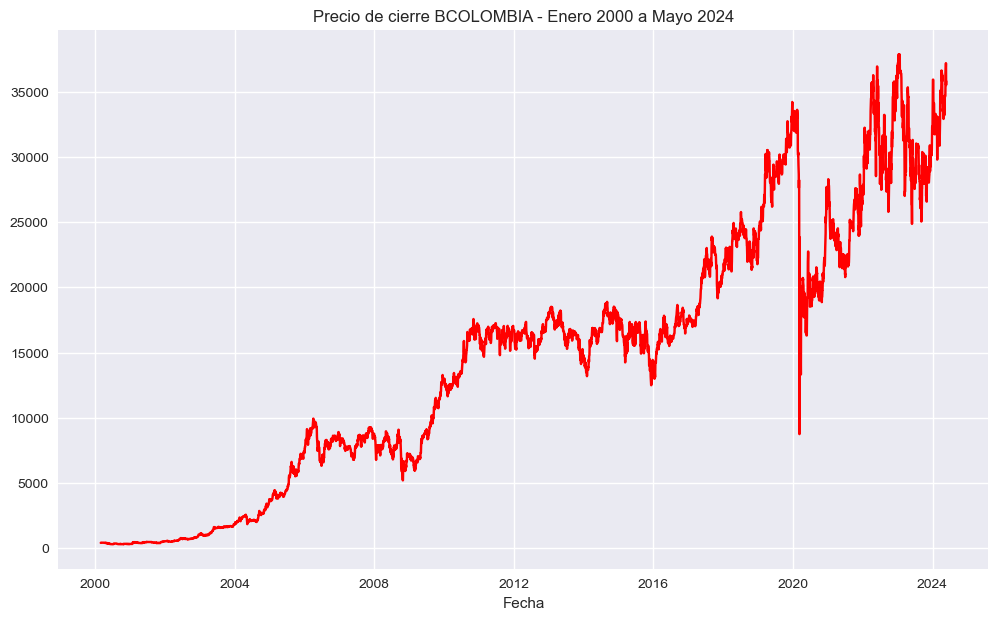

In [102]:
##plot del precio de cierre adjustado BANCOLOMBIA
##Seleccionar la columna del ticker del df
ticker_sel = df_AdjClose_portfolio.Cierre_Ajustado['BCOLOMBIA.CL']

##
plt.figure(figsize=(12, 7)) #Dale tamaño al gráfico
plt.plot(ticker_sel, color='red') #Define sobre que hacer el gráfico
plt.title('Precio de cierre BCOLOMBIA - Enero 2000 a Mayo 2024') #Incorpora título al gráfico
plt.ylabel('') #Nombre o etiqueta del eje "y"
plt.xlabel('Fecha') #Nombre  o etiquetadel eje "x"
#plt.savefig('images/Precio_IPC.png') #Opcional si queremos guardar el gráfico como imagen
plt.show()

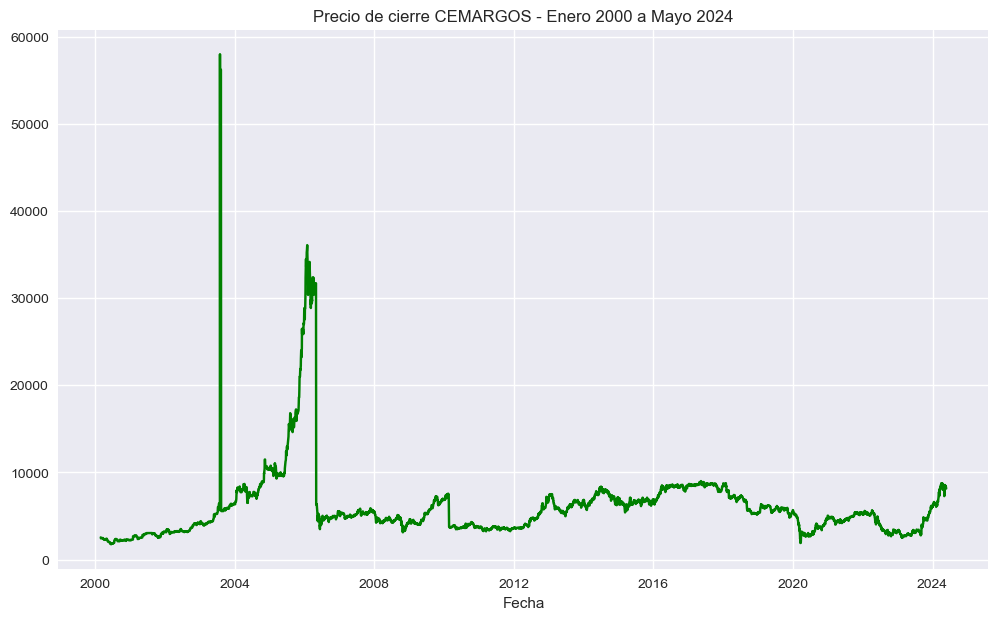

In [103]:
##plot del precio de cierre adjustado CEMARGOS.CL
##Seleccionar la columna del ticker del df
ticker_sel = df_AdjClose_portfolio.Cierre_Ajustado['CEMARGOS.CL']

##
plt.figure(figsize=(12, 7)) #Dale tamaño al gráfico
plt.plot(ticker_sel, color='green') #Define sobre que hacer el gráfico
plt.title('Precio de cierre CEMARGOS - Enero 2000 a Mayo 2024') #Incorpora título al gráfico
plt.ylabel('') #Nombre o etiqueta del eje "y"
plt.xlabel('Fecha') #Nombre  o etiquetadel eje "x"
#plt.savefig('images/Precio_IPC.png') #Opcional si queremos guardar el gráfico como imagen
plt.show()

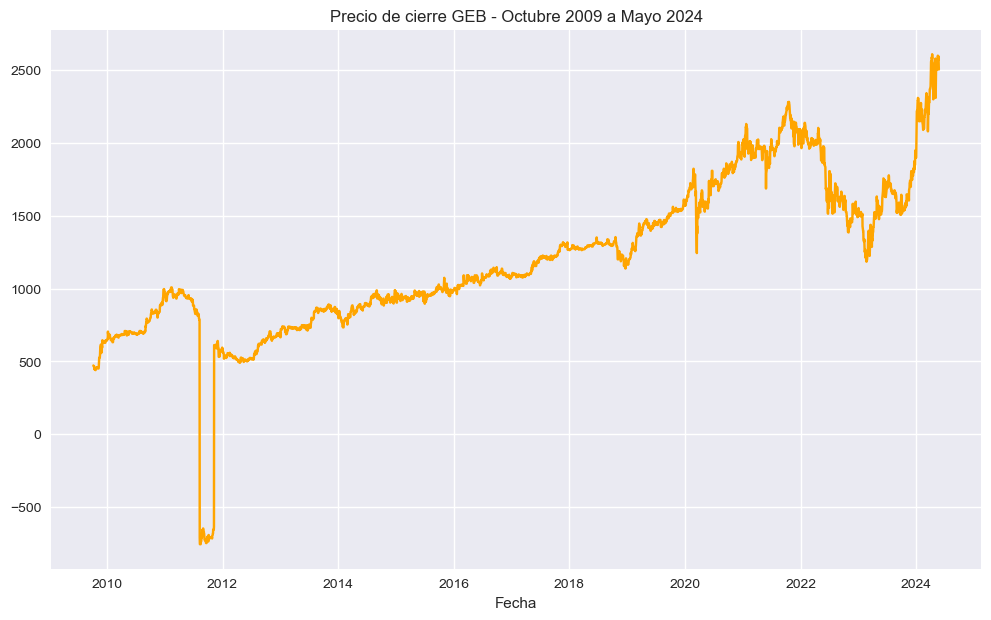

In [105]:
##plot del precio de cierre adjustado GEB.CL
##Seleccionar la columna del ticker del df
ticker_sel = df_AdjClose_portfolio.Cierre_Ajustado['GEB.CL']

##
plt.figure(figsize=(12, 7)) #Dale tamaño al gráfico
plt.plot(ticker_sel, color='orange') #Define sobre que hacer el gráfico
plt.title('Precio de cierre GEB - Octubre 2009 a Mayo 2024') #Incorpora título al gráfico
plt.ylabel('') #Nombre o etiqueta del eje "y"
plt.xlabel('Fecha') #Nombre  o etiquetadel eje "x"
#plt.savefig('images/Precio_IPC.png') #Opcional si queremos guardar el gráfico como imagen
plt.show()

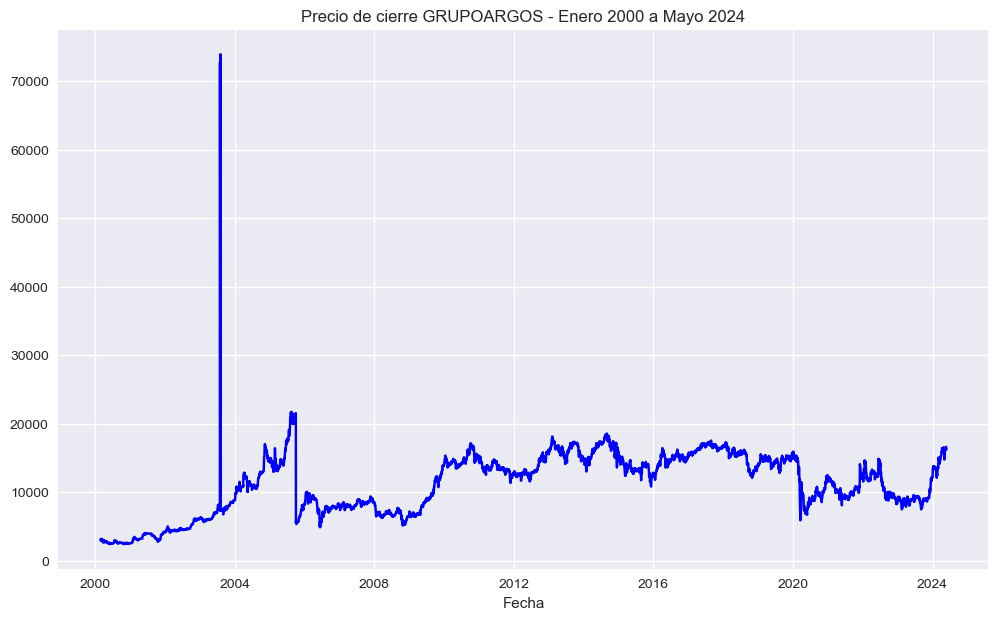

In [106]:
##plot del precio de cierre adjustado GRUPOARGOS.CL
##Seleccionar la columna del ticker del df
ticker_sel = df_AdjClose_portfolio.Cierre_Ajustado['GRUPOARGOS.CL']

##
plt.figure(figsize=(12, 7)) #Dale tamaño al gráfico
plt.plot(ticker_sel, color='blue') #Define sobre que hacer el gráfico
plt.title('Precio de cierre GRUPOARGOS - Enero 2000 a Mayo 2024') #Incorpora título al gráfico
plt.ylabel('') #Nombre o etiqueta del eje "y"
plt.xlabel('Fecha') #Nombre  o etiquetadel eje "x"
#plt.savefig('images/Precio_IPC.png') #Opcional si queremos guardar el gráfico como imagen
plt.show()

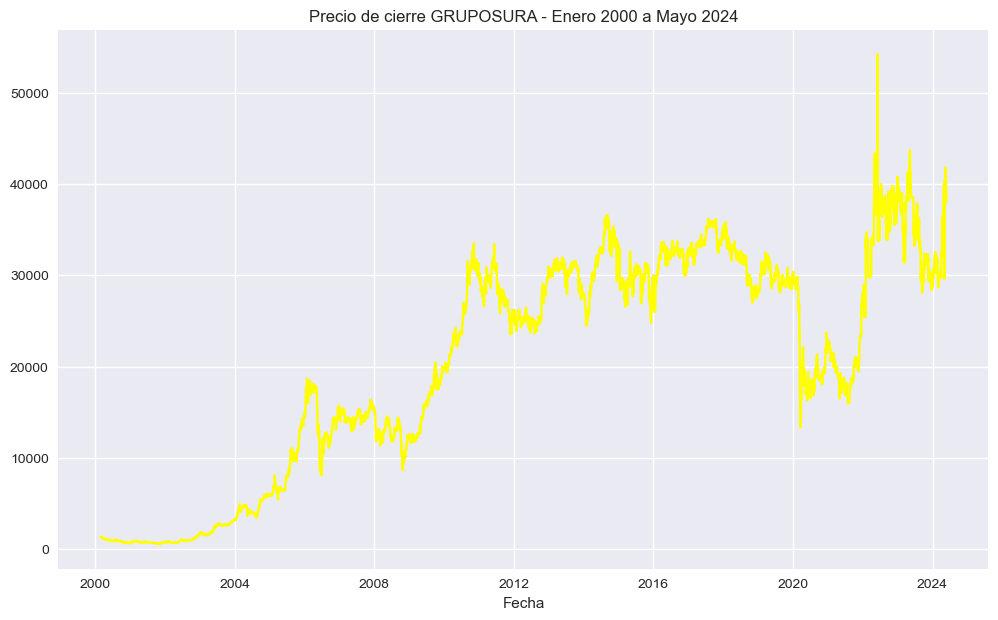

In [107]:
##plot del precio de cierre adjustado GRUPOSURA.CL
##Seleccionar la columna del ticker del df
ticker_sel = df_AdjClose_portfolio.Cierre_Ajustado['GRUPOSURA.CL']

##
plt.figure(figsize=(12, 7)) #Dale tamaño al gráfico
plt.plot(ticker_sel, color='yellow') #Define sobre que hacer el gráfico
plt.title('Precio de cierre GRUPOSURA - Enero 2000 a Mayo 2024') #Incorpora título al gráfico
plt.ylabel('') #Nombre o etiqueta del eje "y"
plt.xlabel('Fecha') #Nombre  o etiquetadel eje "x"
#plt.savefig('images/Precio_IPC.png') #Opcional si queremos guardar el gráfico como imagen
plt.show()

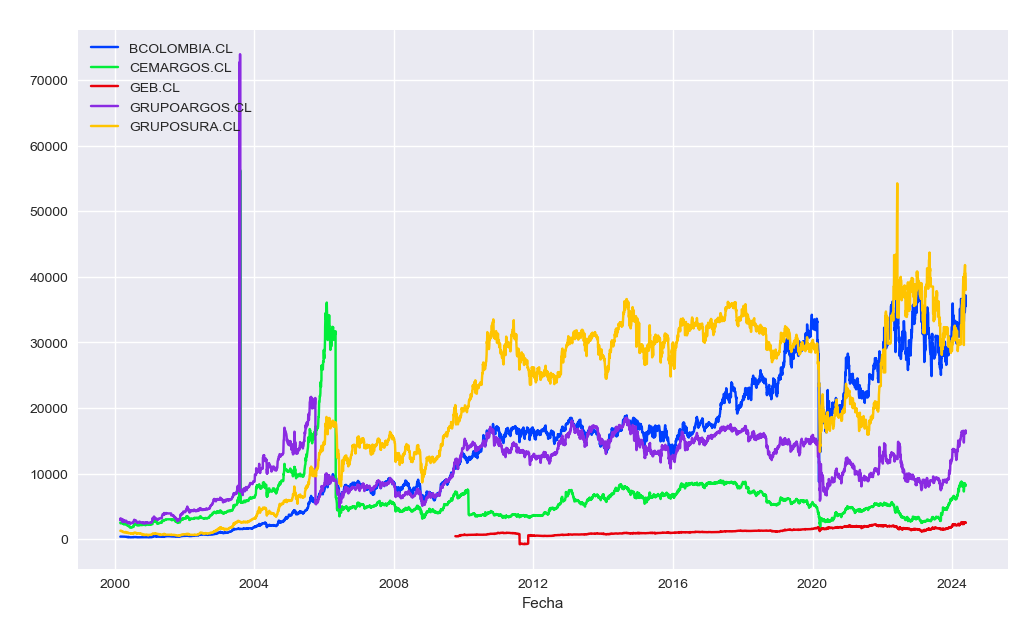

In [108]:
plt.figure(figsize=(12, 7)) #Dale tamaño al gráfico
plt.plot(df_AdjClose_portfolio.Cierre_Ajustado) #Define sobre que hacer el gráfico
plt.legend(['BCOLOMBIA.CL', 'CEMARGOS.CL', 'GEB.CL', 'GRUPOARGOS.CL', 'GRUPOSURA.CL'], loc='upper left') 
plt.title(' ') #Incorpora título al gráfico
plt.ylabel(' ') #Nombre o etiqueta del eje "y"
plt.xlabel('Fecha') #Nombre  o etiquetadel eje "x"
#plt.savefig('images/Precio_IPC.png') #Opcional si queremos guardar el gráfico como imagen
plt.show()

In [112]:
##Indicadores descriptivos para el volumen de las acciones
# Configurar el formato de visualización de los datos para evitar la notación científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Calcular estadísticas descriptivas para cada acción en df_volumes
statistics_df = df_Volume_portfolio.Volumen.describe()

# Seleccionar solo las filas relevantes (cuartiles, media y desviación estándar)
statistics_df = statistics_df.loc[['25%', '50%', '75%', 'mean', 'std']]

# Transponer el DataFrame para que las acciones sean las filas y las estadísticas sean las columnas
statistics_df = statistics_df.transpose()

# Renombrar las columnas para mayor claridad
statistics_df.columns = ['Q1', 'Mediana', 'Q3', 'Media', 'Desv. Std.']

# Mostrar el DataFrame resultante
print(statistics_df)

                     Q1   Mediana         Q3      Media  Desv. Std.
BCOLOMBIA.CL   44280.50 117620.50  257892.50 2067261.61 95813257.24
CEMARGOS.CL    20193.25 194090.00  464849.00  809616.29 20760939.41
GEB.CL        198219.50 539112.50 1326743.25 2205581.21 39313690.75
GRUPOARGOS.CL  34463.50 122048.00  259200.00  999996.78 42188722.00
GRUPOSURA.CL   35041.50 139300.00  313661.00  403434.09  5925549.33


# Análisis del portafolio Optimo

### Cálculo y análisis de rendimientos simples y logarítmicos
Los precios de los activos suelen ser **no estacionarios**, es decir, sus momentos, como la media y la varianza (momentos matemáticos) cambian con el tiempo. Esto también podría significar el observar algunas tendencias o efectos de estacionalidad en la serie de precios.

Al transformar los precios en rendimientos, intentamos hacer estacionaria la serie de tiempo, siendo una propiedad deseada (y necesaria) en el modelado estadístico.
#### **Rendimientos simples**


Se agregan sobre los activos; por ejemplo, el rendimiento de un portafolio es la
suma ponderada de los rendimientos de los activos individuales en el portafolio.

Los rendimientos simples se definen como:

$$R_t=\frac{P_t-P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} -1$$
#### **Rendimientos logarítmicos**


Se agregan con el tiempo.

Los rendimientos logarírtmicos se definen como:

$$R_t= log\frac{P_t}{P_{t-1}}= log(P_t)-log(P_{t-1})$$

Entre las ventajas del uso de rendimientos logarítmicos destacan:


*   **Log-normalidad**: si asumimos que los precios se distribuyen log-normalmente, entonces $log( 1 + r_i )$ se distribuye normalmente. Si $X$ es una variable aleatoria con una distribución normal, entonces $exp(X)$ tiene una distribución log-normal, es decir $e^{X}\sim Lognormal (\mu _{x},\sigma _{x}^{2})$.
*   **Aproximación** a los rendimientos anteriores, sobre todo cuando los rendimientos son muy pequeños.
*   **Adición en el tiempo**: la suma de variables normales no correlacionadas converge a una variable normal (teorema central del límite), esto permite reducir la complejidad en algunos cálculos y trasformaciones de las series de tiempo.
*   **Estabilidad**: la adición de pequeñas cantidades en una serie puede volverse recuerrente, mientras que la multiplicación de números pequeños puede "desbordar" la serie, el uso de logaritmos permite estabilizar la variabilidad que presentan las observaciones.




In [176]:
##Dataframe de precio de cierre ajustado.
df_CierreAjustado_portfolio = df_AdjClose_portfolio.Cierre_Ajustado


In [177]:
#Se quitan los registros sin datos del df
df_CierreAjustado_portfolio = df_CierreAjustado_portfolio.dropna()

In [178]:
## Calculo del portafolio
'''Para calular el portafolio, definimos el vector W con los pesos para cada Ticker segun el portafolio Optimo de Sharpe Ratio
Y se calcula la suma ponderada para cada dia'''

##Vector de pesos W
W =[ 0.1133, 0.4803, 0.1062, 0.1588, 0.1414 ]

##Calcula la suma ponderada (portafolio) por dia
df_CierreAjustado_portfolio['inv_port'] = df_CierreAjustado_portfolio.dot(W)


##DataFrame con precios de cierre y portafolio
df_CierreAjustado_portfolio


BCOLOMBIA.CL  CEMARGOS.CL  GEB.CL  GRUPOARGOS.CL  GRUPOSURA.CL  \
Date                                                                         
2009-10-07      11452.64      7249.89  471.60       12185.39      20424.70   
2009-10-08      11419.29      7123.59  466.83       12229.12      20345.53   
2009-10-09      11208.02      7212.00  465.34       12025.05      19617.21   
2009-10-12      11208.02      7212.00  465.34       12025.05      19617.21   
2009-10-13      10963.40      7009.91  461.10       11660.67      18778.05   
...                  ...          ...     ...            ...           ...   
2024-05-17      36400.00      8400.00 2600.00       16280.00      40500.00   
2024-05-20      37200.00      8360.00 2570.00       16360.00      40500.00   
2024-05-21      37140.00      8300.00 2595.00       16600.00      40060.00   
2024-05-22      35520.00      8270.00 2550.00       16140.00      39980.00   
2024-05-23      35820.00      8150.00 2505.00       16300.00      38000.00   

            inv_port  
Date                  
2009-10-07   9652.89  
2009-10-08   9583.68  
2009-10-09   9466.66  
2009-10-12   9466.66  
2009-10-13   9164.91  
...              ...  
2024-05-17  16746.72  
2024-05-20  16827.67  
2024-05-21  16770.60  
2024-05-22  16483.51  
2024-05-23  16200.52  

[3803 rows x 6 columns]

In [179]:
##Se se toma la serie del portafolio calculado
inv_port = df_CierreAjustado_portfolio.loc[:,["inv_port"]]
inv_port.rename(columns={"inv_port": "Cierre_Ponderado"}, inplace= True)

inv_port.head()

Cierre_Ponderado
Date                        
2009-10-07           9652.89
2009-10-08           9583.68
2009-10-09           9466.66
2009-10-12           9466.66
2009-10-13           9164.91

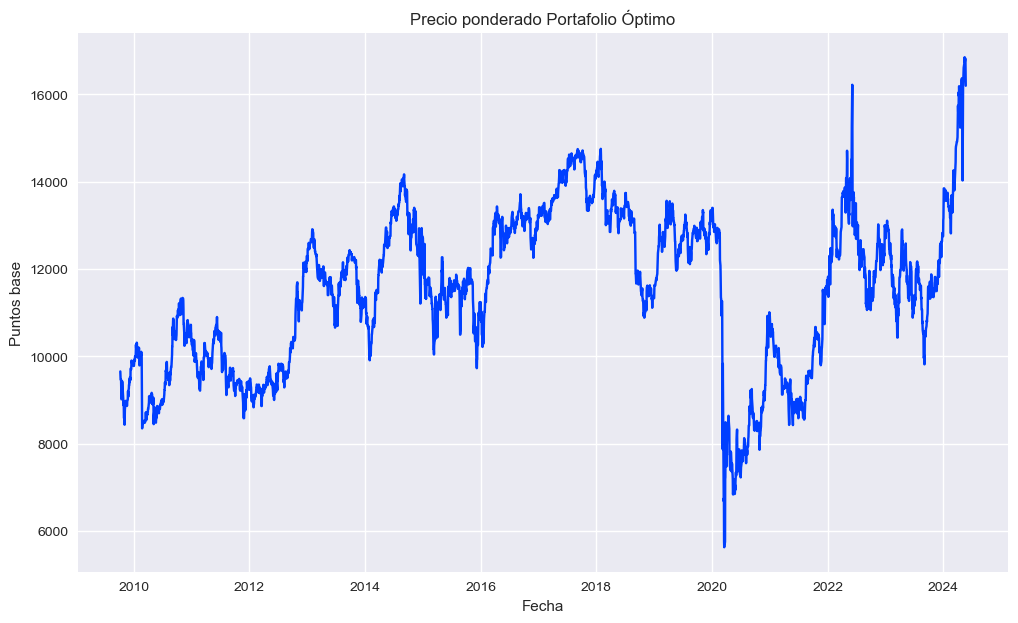

In [180]:
##grafico portafolio optimo
plt.figure(figsize=(12, 7)) #Dale tamaño al gráfico
plt.plot(inv_port) #Define sobre que hacer el gráfico
plt.title('Precio ponderado Portafolio Óptimo') #Incorpora título al gráfico
plt.ylabel('Puntos base') #Nombre o etiqueta del eje "y"
plt.xlabel('Fecha') #Nombre  o etiquetadel eje "x"
#plt.savefig('images/Precio_IPC.png') #Opcional si queremos guardar el gráfico como imagen
plt.show()

In [181]:
##Calcula los rendimientos simples y logaritmicos del portafolio
inv_port['rend_simple'] = inv_port.Cierre_Ponderado.pct_change()
inv_port['rend_log'] = np.log(inv_port.Cierre_Ponderado/inv_port.Cierre_Ponderado.shift(1))

inv_port.head(10)

Cierre_Ponderado  rend_simple  rend_log
Date                                               
2009-10-07           9652.89          NaN       NaN
2009-10-08           9583.68        -0.01     -0.01
2009-10-09           9466.66        -0.01     -0.01
2009-10-12           9466.66         0.00      0.00
2009-10-13           9164.91        -0.03     -0.03
2009-10-14           9013.58        -0.02     -0.02
2009-10-15           9017.49         0.00      0.00
2009-10-16           9133.76         0.01      0.01
2009-10-19           9425.18         0.03      0.03
2009-10-20           9362.44        -0.01     -0.01

[Text(0.5, 0, 'Fecha'), Text(0, 0.5, 'Rendimientos logarítmicos (%)')]

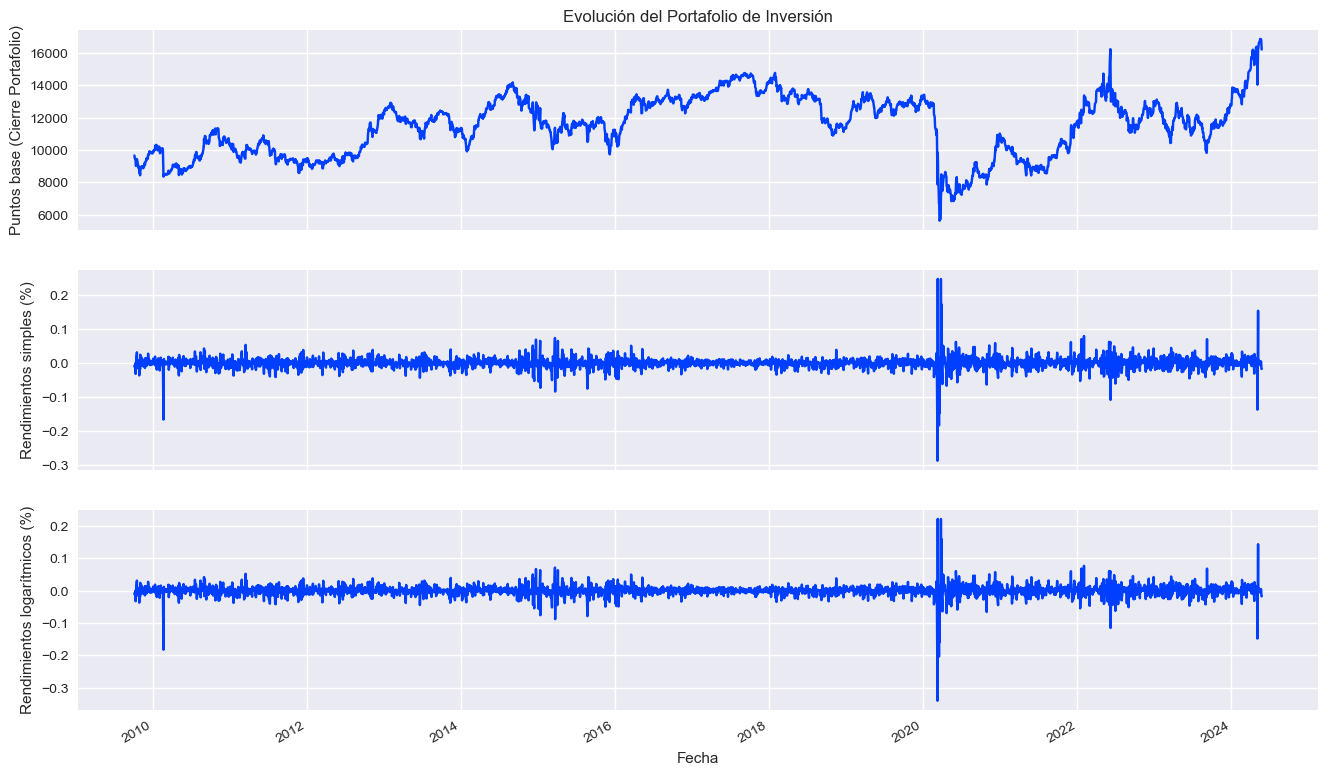

In [182]:
##Grafica el cierre ponderado, rendimiento simple y rendimiendo logaritmico
fig, ax = plt.subplots(3, 1, figsize=(16, 10), sharex=True)
inv_port.Cierre_Ponderado.plot(ax=ax[0])
ax[0].set(title = 'Evolución del Portafolio de Inversión',
ylabel = 'Puntos base (Cierre Portafolio)')
inv_port.rend_simple.plot(ax=ax[1])
ax[1].set(ylabel = 'Rendimientos simples (%)')
inv_port.rend_log.plot(ax=ax[2])
ax[2].set(xlabel = 'Fecha',
ylabel = 'Rendimientos logarítmicos (%)')


### Ventanas móviles sobre media y desviación estándar
El uso de ventanas móviles permite 'suavizar' las series de tiempo para analizar su tendencia. Conforme la ventana de tiempo es mas amplia, mayor es la suavización y por ende, la tendencia se despega más del precio de cierre real.

In [183]:
#Calcula la media y desviación estándar móvil sobre precio del Portafolio
inv_port_rolling = inv_port[['Cierre_Ponderado']].rolling(window=21).agg(['mean', 'std']) #se puede cambiar la ventana móvil
inv_port_rolling.columns = inv_port_rolling.columns.droplevel() #mean = media, std= desviación estándar
inv_port_rolling

mean    std
Date                      
2009-10-07      NaN    NaN
2009-10-08      NaN    NaN
2009-10-09      NaN    NaN
2009-10-12      NaN    NaN
2009-10-13      NaN    NaN
...             ...    ...
2024-05-17 16147.03 632.17
2024-05-20 16199.30 641.28
2024-05-21 16272.12 613.27
2024-05-22 16311.70 597.91
2024-05-23 16327.44 589.99

[3803 rows x 2 columns]

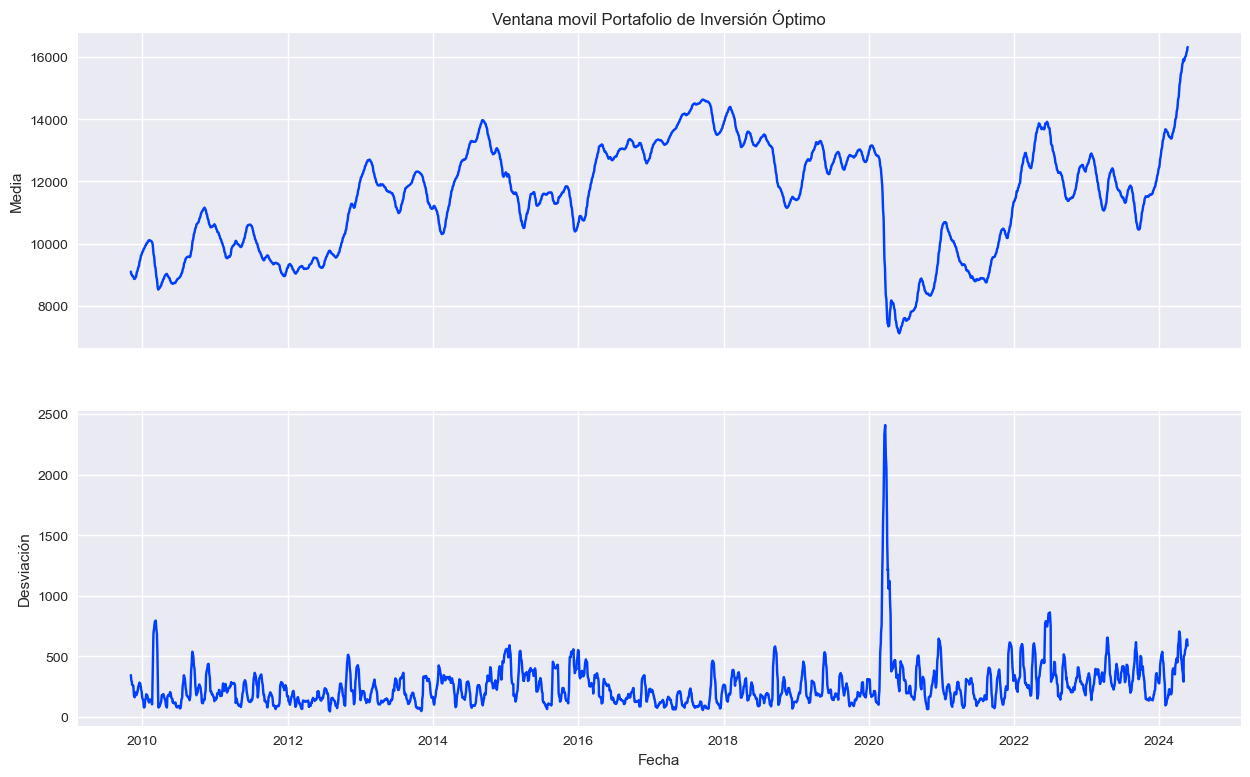

In [184]:
##Grafica la media y desviaciones móviles
fig, ax = plt.subplots(2, 1, sharex=True,figsize=(15, 9))
ax[0].plot(inv_port_rolling['mean'])
ax[0].set(title = 'Ventana movil Portafolio de Inversión Óptimo',
          ylabel = 'Media')
ax[1].plot(inv_port_rolling['std'])
ax[1].set(ylabel = 'Desviación',
          xlabel="Fecha")
plt.show()


## Analisis descriptivo serie de tiempo del porfatolio de Inversión

Para crear un modelo ARIMA, es crucial realizar un análisis exploratorio que permita comprender a fondo la dinámica de los datos. Este paso preliminar es esencial antes de entrenar el modelo, ya que proporciona la información necesaria para ajustarlo correctamente. A continuación, se detallan los análisis que se deben llevar a cabo:

**Estacionariedad:** Se refiere a que las propiedades estadísticas de la serie, como la media y la varianza, sean constantes a lo largo del tiempo. Las series temporales con tendencias o estacionalidad no cumplen con este requisito, por lo que deben someterse a pruebas como la Dickey-Fuller aumentada para verificar su estacionariedad. Si no son estacionarias, es necesario diferenciarlas hasta lograr la constancia de sus propiedades, determinando así el parámetro 𝑑 del modelo.

**Análisis de autocorrelación:** Mediante la gráfica de las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF), se pueden identificar las relaciones de rezago entre los valores de la serie. Este análisis visual es fundamental para determinar los términos autorregresivos (AR) y de media móvil (MA), representados por los parámetros 𝑝 y 𝑞, respectivamente.

**Descomposición estacional:** En series donde se sospecha de estacionalidad, se recomienda descomponer la serie en sus componentes de tendencia, estacionalidad y residuos. Técnicas como la descomposición estacional de series temporales (STL) pueden revelar patrones ocultos, facilitando la identificación de la estacionalidad y los valores óptimos de los parámetros estacionales 𝑃, 𝐷, 
𝑄 y el periodo 𝑚.

Estos análisis exploratorios son fundamentales para establecer una base sólida que permita construir un modelo ARIMA eficaz, capaz de capturar los patrones y las relaciones inherentes en los datos.



In [351]:
inv_port.head()

Cierre_Ponderado  rend_simple  rend_log
Date                                               
2009-10-07           9652.89          NaN       NaN
2009-10-08           9583.68        -0.01     -0.01
2009-10-09           9466.66        -0.01     -0.01
2009-10-12           9466.66         0.00      0.00
2009-10-13           9164.91        -0.03     -0.03

In [360]:
inv_port.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3803 entries, 2009-10-07 to 2024-05-23
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cierre_Ponderado  3803 non-null   float64
 1   rend_simple       3802 non-null   float64
 2   rend_log          3802 non-null   float64
dtypes: float64(3)
memory usage: 247.9 KB


In [352]:
import pandas as pd


portfolio = inv_port['Cierre_Ponderado']
portfolio = portfolio.reset_index()

# Renombrar las columnas para que tengan nombres significativos
portfolio.columns = ['Date', 'Cierre']

# Convertir la columna 'Date' a tipo datetime (opcional, pero recomendado)
portfolio['Date'] = pd.to_datetime(portfolio['Date'])

# Establecer 'Date' como índice
portfolio.set_index('Date', inplace=True)

# Asegurarse de que el índice es un DatetimeIndex con una frecuencia establecida
portfolio = portfolio.asfreq('B')  # 'B' para frecuencia de días hábiles

# Interpolar valores faltantes
portfolio['Cierre'] = portfolio['Cierre'].interpolate()

#portfolio.info()
#print(type(portfolio))
#portfolio


### Estacionariedad

Test estacionariedad serie original
-------------------------------------
ADF Statistic: -2.4172683650348064, p-value: 0.136922
KPSS Statistic: 1.4997555614038796, p-value: 0.010000

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -14.810647693261624, p-value: 0.000000
KPSS Statistic: 0.06504729262967378, p-value: 0.100000

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -19.353706733317882, p-value: 0.000000
KPSS Statistic: 0.10763402870372697, p-value: 0.100000


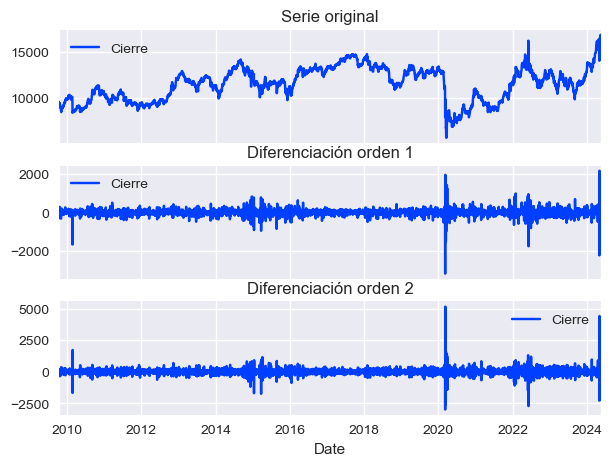

In [358]:
# Test estacionariedad
# ==============================================================================
warnings.filterwarnings("ignore")

portfolio_diff_1 = portfolio.diff().dropna()
portfolio_diff_2 = portfolio_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(portfolio)
kpss_result = kpss(portfolio)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {format(adfuller_result[1], "f")}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {format(kpss_result[1], "f")}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(portfolio_diff_1)
kpss_result = kpss(portfolio_diff_1)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {format(adfuller_result[1], "f")}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {format(kpss_result[1], "f")}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(portfolio_diff_2)
kpss_result = kpss(portfolio_diff_2)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {format(adfuller_result[1], "f")}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {format(kpss_result[1], "f")}')

warnings.filterwarnings("default")

# Gráfico series
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(7, 5), sharex=True)
portfolio.plot(ax=axs[0], title='Serie original')
portfolio_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
portfolio_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');


### Análisis de autocorrelación (Función de autocorrelación (ACF) y Función de autocorrelación parcial (PACF))

#### Función de autocorrelación (ACF)

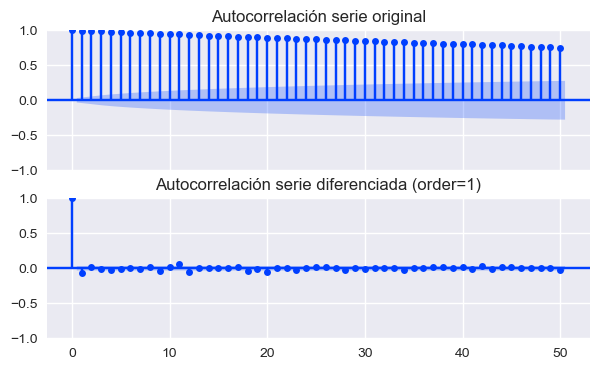

In [354]:
# Grafico de autocorrelación para la serie original y la serie diferenciada
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 4), sharex=True)
plot_acf(portfolio, ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Autocorrelación serie original')
plot_acf(portfolio_diff_1, ax=axs[1], lags=50, alpha=0.05)
axs[1].set_title('Autocorrelación serie diferenciada (order=1)');

#### Función de autocorrelación parcial (PACF)

C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


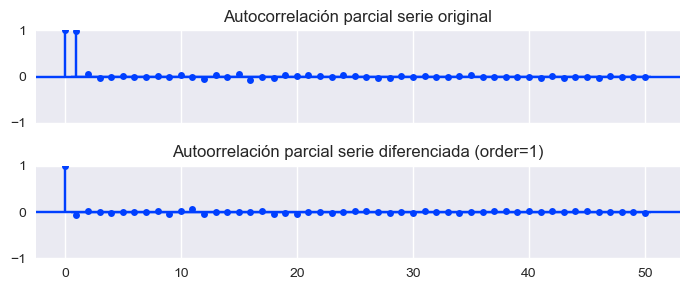

In [355]:
# Autocorrelación parcial para la serie original y la serie diferenciada
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 3), sharex=True)
plot_pacf(portfolio, ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Autocorrelación parcial serie original')
plot_pacf(portfolio_diff_1, ax=axs[1], lags=50, alpha=0.05)
axs[1].set_title('Autoorrelación parcial serie diferenciada (order=1)');
plt.tight_layout();

warnings.filterwarnings("default")

### Descomposición de series temporales

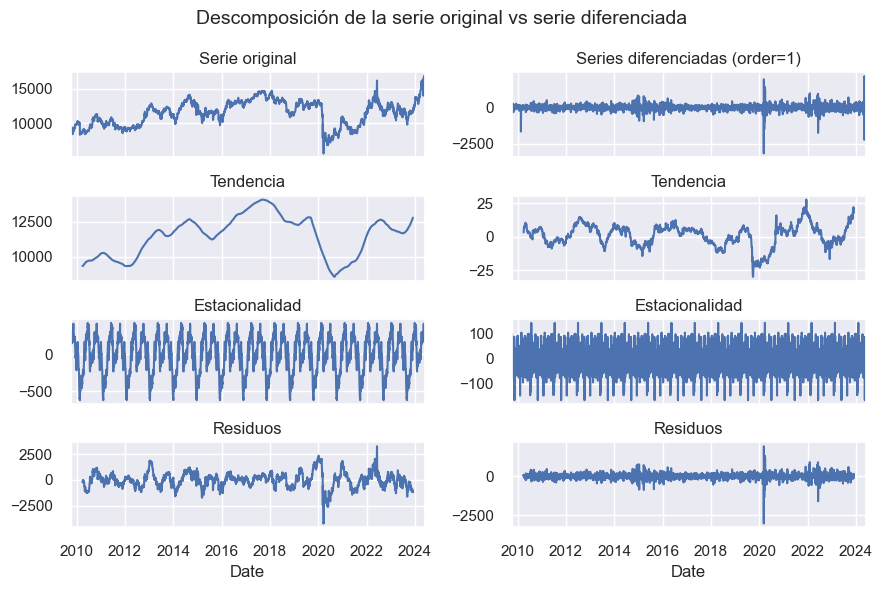

In [363]:
# Descomposición de la serie original y la serie diferenciada
# ==============================================================================
#res_decompose = seasonal_decompose(portfolio, model='additive', extrapolate_trend='freq')
#res_descompose_diff_2 = seasonal_decompose(portfolio_diff_1, model='additive', extrapolate_trend='freq')

#extracting daily seasonality from raw time series
res_decompose = sm.tsa.seasonal_decompose(portfolio, period=252)
res_descompose_diff_2 = sm.tsa.seasonal_decompose(portfolio_diff_1, period=252)


fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(9, 6), sharex=True)
res_decompose.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original')
res_decompose.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia')
res_decompose.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad')
res_decompose.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos')
res_descompose_diff_2.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order=1)')
res_descompose_diff_2.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia')
res_descompose_diff_2.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad')
res_descompose_diff_2.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos')
fig.suptitle('Descomposición de la serie original vs serie diferenciada', fontsize=14)
fig.tight_layout();


warnings.filterwarnings("default")

# Modelado

## **Modelo AUTOARIMA**

In [365]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
#!pip install pmdarima
!pip install tensorflow

import pmdarima as pm
from pmdarima import auto_arima
import tensorflow as tf
from statsmodels.tsa.stattools import acf

                                              0.0/377.0 MB ? eta -:--:--
                                              0.1/377.0 MB 3.0 MB/s eta 0:02:07
                                              0.5/377.0 MB 5.6 MB/s eta 0:01:07
                                             1.5/377.0 MB 12.3 MB/s eta 0:00:31
                                             3.2/377.0 MB 18.5 MB/s eta 0:00:21
                                             5.2/377.0 MB 24.0 MB/s eta 0:00:16
                                             7.3/377.0 MB 27.4 MB/s eta 0:00:14
                                             9.2/377.0 MB 29.4 MB/s eta 0:00:13
     -                                      11.1/377.0 MB 40.9 MB/s eta 0:00:09
     -                                      12.8/377.0 MB 40.9 MB/s eta 0:00:09
     -                                      14.8/377.0 MB 40.9 MB/s eta 0:00:09
     -                                      16.4/377.0 MB 43.7 MB/s eta 0:00:09
     -                                      18.

sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x1ca75f66b30>


In [368]:
##Se divide el dataset en train y test
'''Dividimos el conjunto de datos de  en conjuntos de entrenamiento (training)y prueba (test) y usamos el conjunto de 
entrenamiento para ajustar el modelo y generar una predicción para cada elemento en el conjunto de prueba.'''

##Se asigna a ticker el df del portafolio para mayor practicidad
ticker = inv_port

##Se definen los dataset con cantidades 70%-30%
train_data, test_data = ticker[0:int(len(ticker)*0.7)],ticker[int(len(ticker)*0.7):]

training_data = train_data['Cierre_Ponderado']
test_data = test_data['Cierre_Ponderado']

print(training_data)
print(test_data)

Date
2009-10-07    9652.89
2009-10-08    9583.68
2009-10-09    9466.66
2009-10-12    9466.66
2009-10-13    9164.91
               ...   
2019-12-26   13097.58
2019-12-27   13121.67
2019-12-30   13271.27
2019-12-31   13271.27
2020-01-01   13271.27
Name: Cierre_Ponderado, Length: 2662, dtype: float64
Date
2020-01-02   13271.27
2020-01-03   13400.80
2020-01-06   13400.80
2020-01-07   13256.75
2020-01-08   13143.56
               ...   
2024-05-17   16746.72
2024-05-20   16827.67
2024-05-21   16770.60
2024-05-22   16483.51
2024-05-23   16200.52
Name: Cierre_Ponderado, Length: 1141, dtype: float64


In [382]:
#Se genera el AutoARIMA
model_portf = auto_arima(training_data, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      d=1,
                      seasonal=False,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      scoring='mse',
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=33677.503, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=33674.075, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=33675.546, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=33675.554, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=33672.344, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.705 seconds


In [401]:
# Se extrae el orden y AIC del mejor modelo segun resultado autoARIMA
best_order = model_portf.order
best_aic = model_portf.aic()
print("El mejor modelo es ARIMA{}, con AIC = {}".format(best_order, best_aic))
print("==============================================================================")

#Se imprime el resumen del mejor modelo segun resultado autoARIMA
print(model_portf.summary())


El mejor modelo es ARIMA(0, 1, 0), con AIC = 33672.34392474744
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2662
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -16835.172
Date:                Tue, 28 May 2024   AIC                          33672.344
Time:                        12:48:32   BIC                          33678.230
Sample:                             0   HQIC                         33674.474
                               - 2662                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.831e+04    175.979    104.027      0.000     1.8e+04    1.87e+04
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):      

In [402]:
#Se ajusta el Modelo con el mejor modelo ARIMA segun AIC AutoARIMA
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order= best_order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = np.sqrt(MSE_error)

print('Error medio cuadrado (MSE): {}'.format(MSE_error))
print('Root Mean Squared Error (RMSE): {}'.format(RMSE_error))



Error medio cuadrado (MSE): 64050.02181307541
Root Mean Squared Error (RMSE): 253.08105779191655


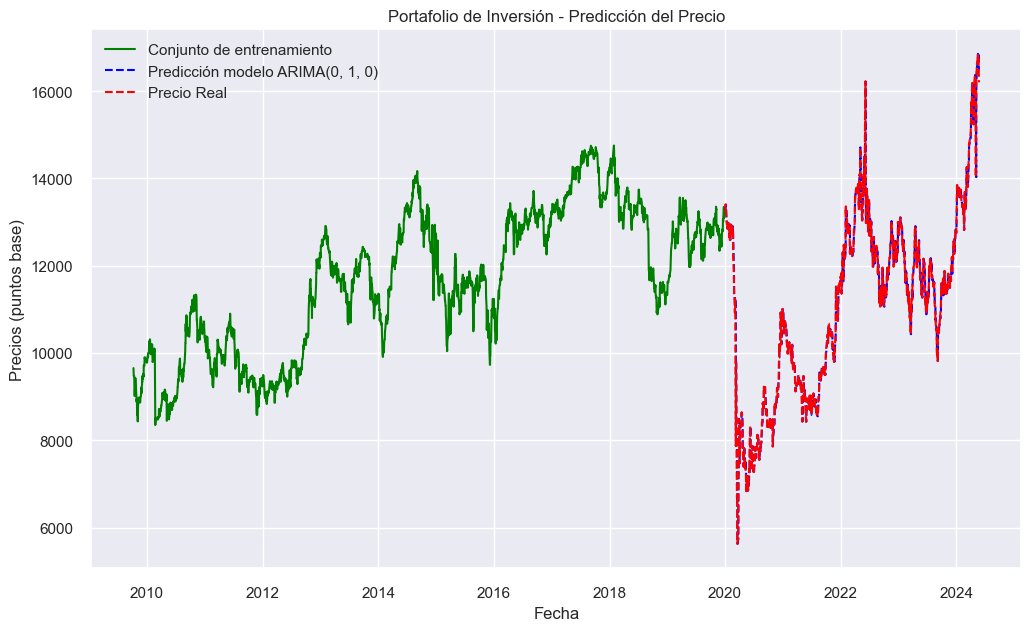

In [403]:
#Se grafica la serie de tiempo del portafolio de Inversión y la prediccion con el modelo ARIMA
plt.figure(figsize=(12, 7))
train_set_range = ticker[0:int(len(ticker)*0.7)].index
test_set_range = ticker[int(len(ticker)*0.7):].index
plt.plot(train_set_range , training_data, color='green',label='Conjunto de entrenamiento')
plt.plot(test_set_range, model_predictions, color='blue', marker='+', linestyle='dashed',label='Predicción modelo ARIMA(0, 1, 0)')
plt.plot(test_set_range, test_data, color='red', linestyle='dashed', label='Precio Real')
plt.title('Portafolio de Inversión - Predicción del Precio')
plt.xlabel('Fecha')
plt.ylabel('Precios (puntos base)')
plt.legend()
plt.show()

### Supuestos del Modelo ARIMA
**Prueba de normalidad:** Esta prueba verifica si los residuales se distribuyen normalmente alrededor de cero. Puedes utilizar la prueba de Shapiro-Wilk. 

**Prueba de homocedasticidad:** Esta prueba verifica si la varianza de los residuales es constante a lo largo del tiempo. Puedes utilizar la prueba de Breusch-Pagan / Durbin-Watson para evaluar la homocedasticidad.

**Prueba de independencia:** Esta prueba verifica si los residuales no están correlacionados entre sí. Puedes utilizar la prueba de autocorrelación Ljung-Box para evaluar la independencia.

In [413]:
residuals = model_fit.resid

In [424]:
##Prueba de Normalidad Shapiro-Wilk
print("================== Prueba de Normalidad Shapiro-Wilk =========================")
from scipy.stats import shapiro

# Calcular la prueba de Shapiro-Wilk
stat, p_value = shapiro(residuals)

# Interpretar los resultados
if p_value > 0.05:
    print("No se rechaza la hipótesis de normalidad (p-valor:",p_value,").")
else:
    print("Se rechaza la hipótesis de normalidad (p-valor:",p_value,").")
print("==============================================================================")
print("                                                                              ")
###############################################################################

##Prueba de homocedasticidad Breusch-Pagan / Durbin-Watson
print("========= Prueba de homocedasticidad Breusch-Pagan / Durbin-Watson ===========")
# Crear una matriz de variables independientes (en este caso solo una constante)
exog = sm.add_constant(np.arange(len(residuals)))

# Calcular la prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuals, exog)

# Interpretar los resultados
p_value = bp_test[1]
if p_value > 0.05:
    print(f"No se rechaza la hipótesis de homocedasticidad (p-valor: {p_value}).")
else:
    print(f"Se rechaza la hipótesis de homocedasticidad (p-valor: {p_value}).")
print("==============================================================================")
print("                                                                              ")
###############################################################################
##Prueba de independencia Ljung-Box
print("=================== Prueba de independencia Ljung-Box ========================")
from statsmodels.tsa.stattools import acf

# Calcular la prueba de autocorrelación Ljung-Box
lb_test = acf(residuals, nlags=12, qstat=True)

# Interpretar los resultados
for i, p_value in enumerate(lb_test[1]):
    if p_value <= 0.05:
        print("Se detecta autocorrelación en el rezago", i + 1, "(p-valor:", p_value,").")

if not any(p_value <= 0.05 for p_value in lb_test[1]):
    print("No se detecta autocorrelación significativa (p-valor:", p_value,").")
print("==============================================================================")

================== Prueba de Normalidad Shapiro-Wilk =========================
Se rechaza la hipótesis de normalidad (p-valor: 0.0 ).
                                                                              
========= Prueba de homocedasticidad Breusch-Pagan / Durbin-Watson ===========
No se rechaza la hipótesis de homocedasticidad (p-valor: 0.27069334376280846).
                                                                              
=================== Prueba de independencia Ljung-Box ========================
No se detecta autocorrelación significativa (p-valor: 21.241176432946865 ).


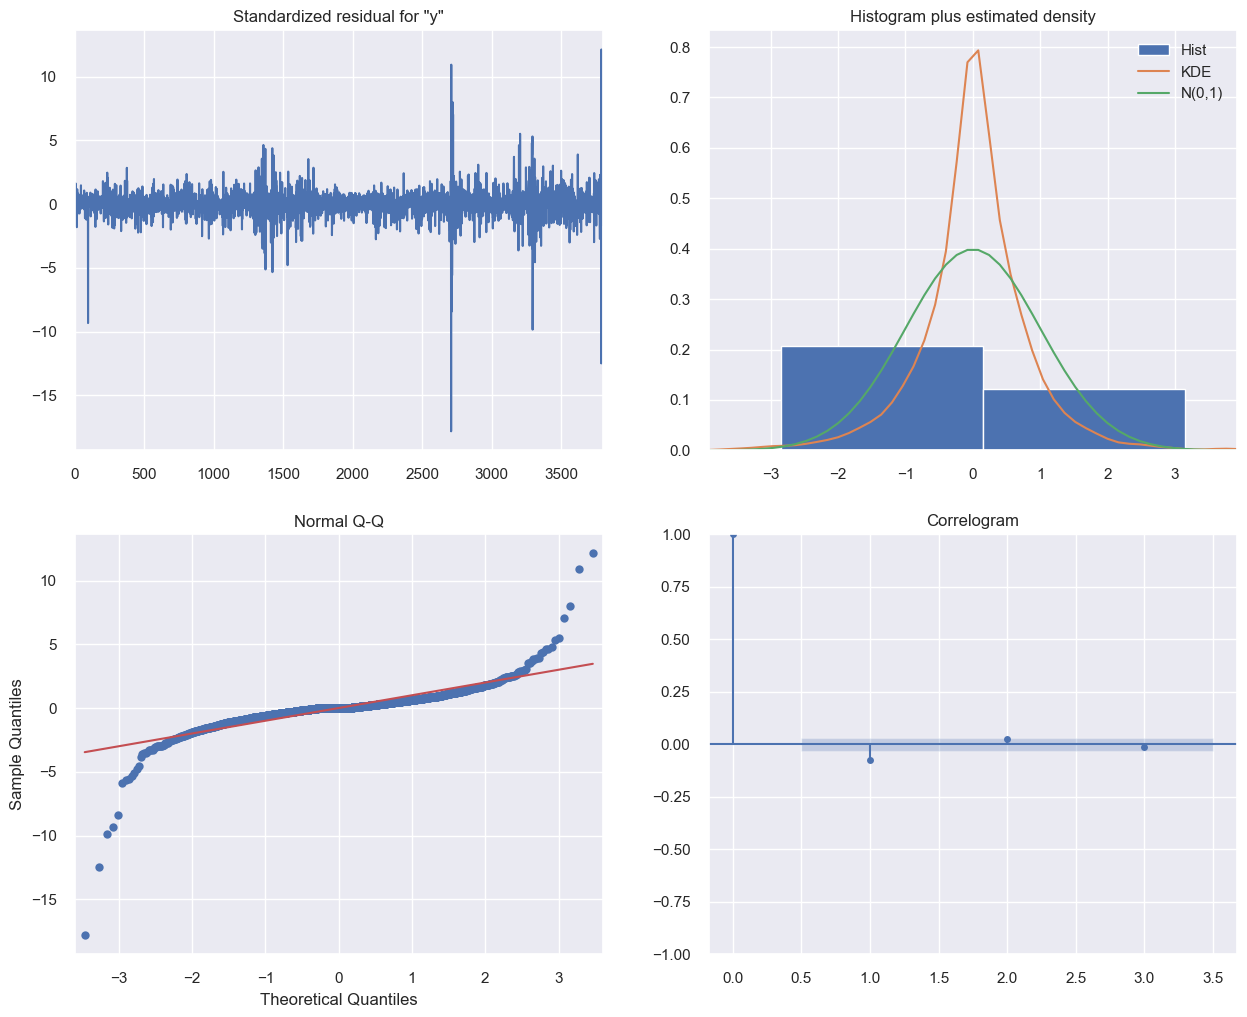

In [406]:
## Analisis Grafico Residuales
model_fit.plot_diagnostics(figsize = (15, 12), lags = 3);

## **Modelo Random Forest y Gradient Boosting**

In [452]:
# Manipulación de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

# Modelado
# ==============================================================================
#!pip install xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.preprocessing import TimeSeriesDifferentiator
from sklearn.metrics import mean_absolute_error

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

print(f"Version de skforecast: {skforecast.__version__}")

Version de skforecast: 0.12.1


In [527]:
## Entrenar y evaluar el modelo Random Forest
#=====================================================
#Modelo Random Forest diferencia Orden 1
steps = len(test_data)
forecaster_rf = ForecasterAutoreg(
                    regressor       = RandomForestRegressor(random_state=963),
                    lags            = 12,
                    differentiation = 1
                )

# Entramiento
forecaster_rf.fit(training_data)

# Predicción
predicciones_rf = forecaster_rf.predict(steps=steps)
predicciones_rf.index = test_data.index

#Error cuadratico medio
MSE_error_rf = mean_squared_error(test_data, predicciones_rf)
RMSE_error_rf = np.sqrt(MSE_error_rf)

print(f"Error medio cuadrado (MSE): {MSE_error_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE_error_rf:.2f}")


Error medio cuadrado (MSE): 11304194.22
Root Mean Squared Error (RMSE): 3362.17


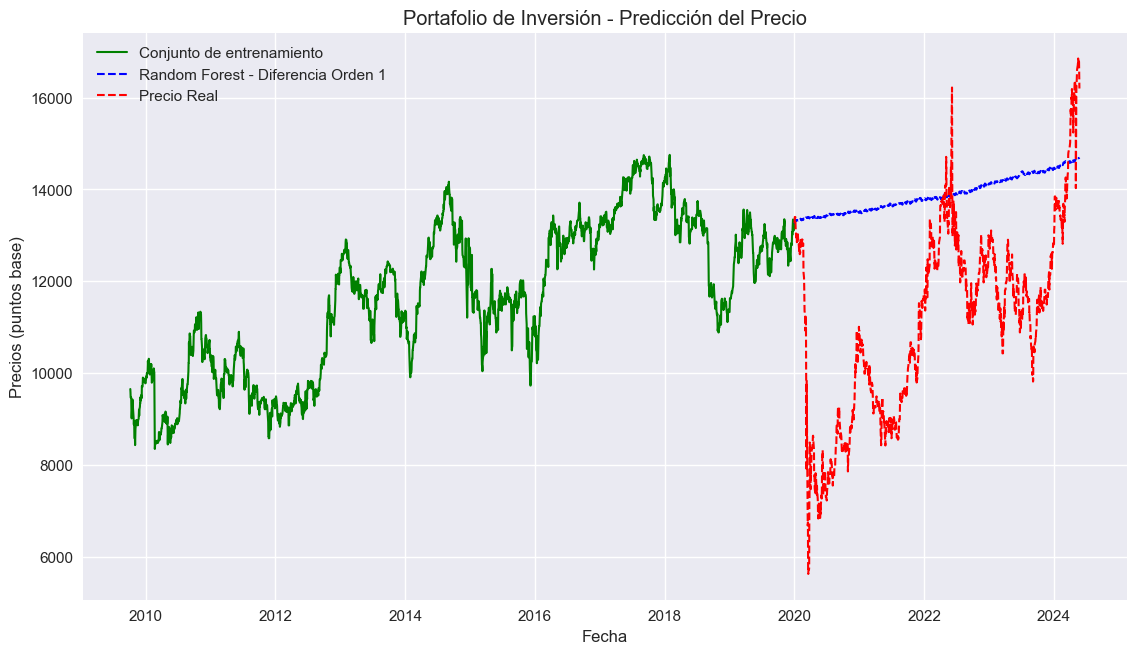

In [519]:
#Se grafica la serie de tiempo del portafolio de Inversión y la prediccion con el modelo Random Forest
plt.figure(figsize=(12, 7))
train_set_range = ticker[0:int(len(ticker)*0.7)].index
test_set_range = ticker[int(len(ticker)*0.7):].index
plt.plot(train_set_range , training_data, color='green',label='Conjunto de entrenamiento')
plt.plot(test_set_range, predicciones_rf, color='blue', marker='+', linestyle='dashed',label='Random Forest - Diferencia Orden 1')
plt.plot(test_set_range, test_data, color='red', linestyle='dashed', label='Precio Real')
plt.title('Portafolio de Inversión - Predicción del Precio')
plt.xlabel('Fecha')
plt.ylabel('Precios (puntos base)')
plt.legend()
plt.show()



In [529]:
## Entrenar y evaluar el modelo Gradient Boosting
#=====================================================
#Modelo Gradient Boosting diferencia Orden 1
steps = len(test_data)
forecaster_gb = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 12,
                    differentiation = 1
                )

# Entramiento
forecaster_gb.fit(training_data)

# Predicción
predicciones_gb = forecaster_gb.predict(steps=steps)
predicciones_gb.index = test_data.index

#Error cuadratico medio
MSE_error_gb = mean_squared_error(test_data, predicciones_gb)
RMSE_error_gb = np.sqrt(MSE_error_gb)

print(f"Error medio cuadrado (MSE): {MSE_error_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE_error_gb:.2f}")

Error medio cuadrado (MSE): 10337976.26
Root Mean Squared Error (RMSE): 3215.27


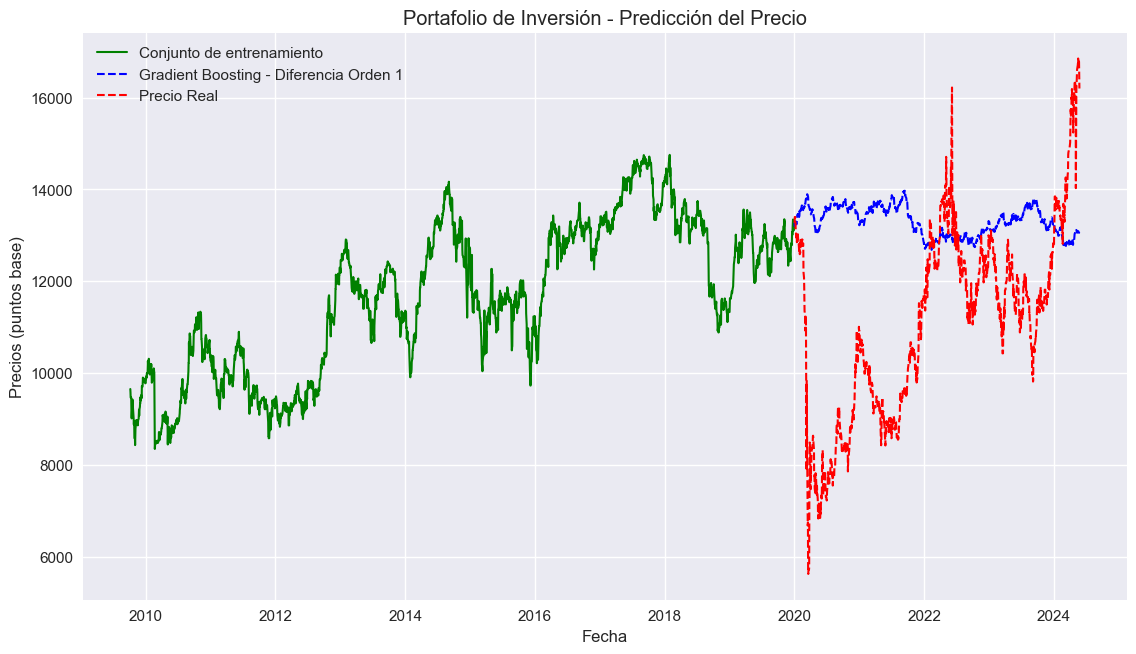

In [525]:
#Se grafica la serie de tiempo del portafolio de Inversión y la prediccion con el modelo Gradient Boosting
plt.figure(figsize=(12, 7))
train_set_range = ticker[0:int(len(ticker)*0.7)].index
test_set_range = ticker[int(len(ticker)*0.7):].index
plt.plot(train_set_range , training_data, color='green',label='Conjunto de entrenamiento')
plt.plot(test_set_range, predicciones_gb, color='blue', marker='+', linestyle='dashed',label='Gradient Boosting - Diferencia Orden 1')
plt.plot(test_set_range, test_data, color='red', linestyle='dashed', label='Precio Real')
plt.title('Portafolio de Inversión - Predicción del Precio')
plt.xlabel('Fecha')
plt.ylabel('Precios (puntos base)')
plt.legend()
plt.show()

ANOTACIONES:
1. ACTIVOS QUE TENGAN RENDIMIENTOS FINANCIEROS ANUALIZADOS POSITIVOS
2. REALIZAR LA SIMULACIÓN CON EL MEJOR PORTAFOLIO SEGÚN SHARPE
3. DOCUMENTAR ESTA SIMULACIÓN, PARA ARGUMENTAR EL PORQUE NO INVERTIR EN ESTAS RECOMENDACIONES
